# OC Data Scientist : Analysez des données de systèmes éducatifs

## Objectif

Réaliser une analyse pré-exploratoire de ce jeu de données pour un projet d’expansion à l’international d'academy,  une start-up de la EdTech.

## Problématique

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

## Étapes

- Valider la qualité de ce jeu de données
- Décrire les informations contenues dans le jeu de données
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde

## Ressources

Vous pouvez retrouver le jeu de données sur le site de la banque mondiale : https://datacatalog.worldbank.org/dataset/education-statistics

# 0. Lancement

## 0.1 Import des librairies

In [123]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import re
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
import matplotlib.path as path
pd.options.mode.chained_assignment = None

In [124]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 945c9ed766a61c7d2c0a7cbb251b6edebf9cb7d5
python           : 3.9.7.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 21.3.0
Version          : Darwin Kernel Version 21.3.0: Wed Jan  5 21:37:58 PST 2022; root:xnu-8019.80.24~20/RELEASE_X86_64
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : fr_FR.UTF-8
LOCALE           : fr_FR.UTF-8

pandas           : 1.3.4
numpy            : 1.20.3
pytz             : 2021.3
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : 0.29.24
pytest           : 6.2.4
hypothesis       : None
sphinx           : 4.2.0
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.3
IPython          : 7.29.0
pandas_datareader: None
bs4           

## 0.0 Fonctions d'aide à la représentation graphique

In [125]:
def GraphBoxplot(df, titre, yvalue, xzone=None):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 10))
    plt.title(titre, size=18)
    plt.xticks(rotation=45, size=10)
    sns.boxplot(x=xzone, y=yvalue, data=df, linewidth=2.5)
    plt.style.use('ggplot')
    return plt.show()

In [4]:
# Créer un graph radar (en étoile)
def GraphRadar(df):

    df_plot = df[["Jeunes connectés","Pouvoir d'achat","Scolarisation","Renouvellement étudiant","Public investment"]]


    # number of variable
    categories=list(df_plot.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]

    sns.set(style="darkgrid")
    fig = plt.figure(1, figsize=(23,12))

    colors = ['g', 'blue', 'c', 'y', 'red', 'm','brown']

    for i, region in enumerate(df.index) : 

        ax = fig.add_subplot(2,3,i+1, polar=True)
        ax.set_theta_offset(np.deg2rad(-90))
        ax.set_theta_direction(-1)
        ax.set_rlabel_position(5)

        # Draw one axe per variable + add labels labels yet
        #plt.xticks(angles, categories, size=8)
        plt.yticks(color="grey", size=0)
        values=df_plot.iloc[i].values
        ax.plot(angles, values, 'o', linewidth=1)
        ax.fill(angles, values, colors[i], alpha=0.25)
        ax.set_xticks(angles)
        plt.xticks(fontsize=13)
        ax.set_xticklabels(categories)
        ax.set_title(region, size=25, color=colors[i])
        ax.set_axisbelow(True)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.2, 
                        hspace=0.35)
        plt.tight_layout()
        ax.grid(True)
        plt.ylim(0,10)

    return plt.show()

In [5]:
def GraphBarplot(df,x_,y_,title,label):

    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))
    plt.title(title, size=18)
    plot = sns.barplot(y = y_, x=x_, data=df)
    plot.set_xticklabels(labels = label, rotation=45, size=10)
    return plt.show()

## 0.2 Lecture des jeux de données

In [6]:
# chargement et affichage des données
path_data = "/Users/alexandredelaguillaumie/Jupyter/Projet 2/csv"
path_data2 = "/Users/alexandredelaguillaumie/Jupyter/Projet 2/"
country = pd.read_csv(os.path.join(path_data,'EdStatsCountry' + '.csv'))
data = pd.read_csv(os.path.join(path_data,'EdStatsData' + '.csv'))
footnote = pd.read_csv(os.path.join(path_data,'EdStatsFootNote' + '.csv'))
series = pd.read_csv(os.path.join(path_data,'EdStatsSeries' + '.csv'))
country_series = pd.read_csv(os.path.join(path_data,'EdStatsCountry-Series' + '.csv'))

## 0.3 Comprendre les différents datasets

In [7]:
print("DATA")
print("Ce jeu de donnée recence toutes les valeurs de chaque indicateur par année et par pays")
data.head(1)


DATA
Ce jeu de donnée recence toutes les valeurs de chaque indicateur par année et par pays


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("COUNTRY")
print("Ce jeu de donnée décrit de manière détaillée toutes les caractéristiques de chaque pays")
country.head(1)

COUNTRY
Ce jeu de donnée décrit de manière détaillée toutes les caractéristiques de chaque pays


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN


In [9]:
print("FOOT NOTE")
print("Ce jeu de donnée nous renseigne sur l'année d'apparition de chaque indicateur par pays")
footnote.head(1)
country_series.count().sum()/country_series.shape[0]

FOOT NOTE
Ce jeu de donnée nous renseigne sur l'année d'apparition de chaque indicateur par pays


3.0

In [10]:
print("SERIES")
print("Ce jeu de donnée donne toutes les informations nécessaires à la compréhension de chaque indicateur")
series.head(1)
# Lorsque à savoir à quoi correspond un indicateur et comment il a été construit, je lance une recherche ici :
series.index = series['Indicator Name']
series.loc['Gross enrolment ratio, tertiary, both sexes (%)']['Long definition']

SERIES
Ce jeu de donnée donne toutes les informations nécessaires à la compréhension de chaque indicateur


'Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving.'

In [11]:
print("COUNTRY SERIES")
print("Ce jeu de donnée nous indique la source internet de l'ensemble des informations stockées") 
country_series.head(1)

COUNTRY SERIES
Ce jeu de donnée nous indique la source internet de l'ensemble des informations stockées


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


## 0.4 Indications générales

In [12]:
# Ligne x Colonne
print('Le jeu de données DATA comporte {} lignes et {} colonnes,'.format(data.shape[0],data.shape[1]))
print('{} indicateurs,'.format(len(data['Indicator Code'].unique())))

# Code Pays
all_name_list = data['Country Name'].unique()
region_list = all_name_list[:25]
country_list = all_name_list[25:]
print('{} pays, {} régions,'.format(len(country_list),len(region_list)))

# Nombre d'années
years = data.columns[4:69]
print('et {} années.'.format(len(years)))

Le jeu de données DATA comporte 886930 lignes et 70 colonnes,
3665 indicateurs,
217 pays, 25 régions,
et 65 années.


## 0.5 Quantité de données par année

Pour connaître le nombre de données disponibles, il a fallu transformer en valeur booléenne toutes les valeurs remplies et les sommer  par année (tout indicateur et pays confondu). 

On remarque un pic de valeurs tous les 5 ans. Nous allons vérifier s'il existe un type d'indicateur aggloméré tous les 5 ans et s'il est à intégrer dans l'analyse de données.


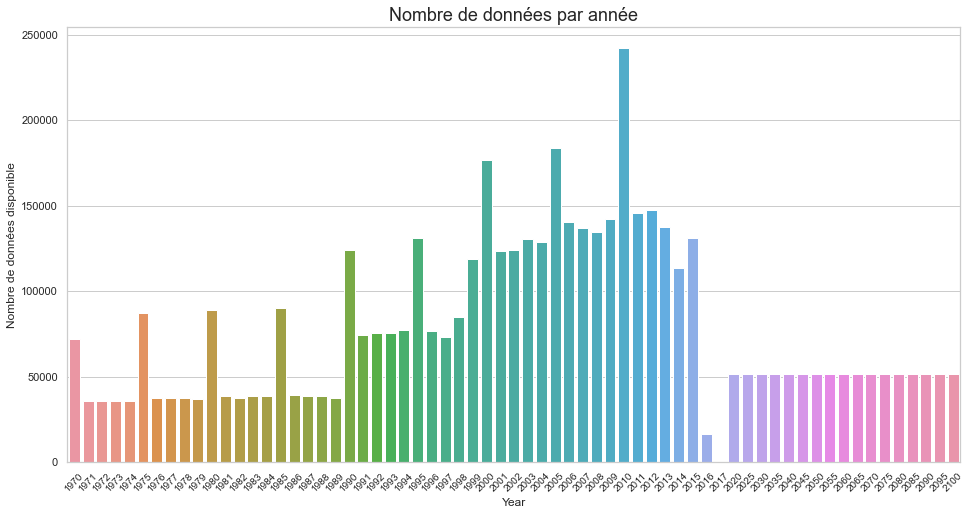

In [13]:
print("On remarque un pic de valeurs tous les 5 ans. Nous allons vérifier s'il existe un type d'indicateur aggloméré tous les 5 ans et s'il est à intégrer dans l'analyse de données.")

year = data.iloc[:,[i for i in range(4,69)]]
year2 = year.count().reset_index()
year2.set_axis(['Year','Nombre de données disponible'], axis=1, inplace=True)

GraphBarplot(df=year2,x_='Year',y_='Nombre de données disponible',title='Nombre de données par année',label=year2['Year'])

## 0.6 Disponibilité des données par groupe d'indicateurs

### Définition de chaque indicateur

BAR : Indicateurs Barro-Lee publiés tous les 5 ans selon 7 niveaux d'éducation.

HH : DHS (Demographic and Health Surveys) + MICS (Multiple Indicator Cluster Surveys)

IT : Infrastructure : utilisateurs internet et ordinateurs.

LO : Learning Outcomes : Evaluation du niveau des élèves (science, littérature, etc.)

NY : National Yield : balance des produits intérieurs et nationaux.

OECD : OCDE : salaires des enseignants du secteur public.

PRJ : Projections Wittgenstein (durée de scolarisation, populations, etc.)

SABER : System Approach for Better Education, aggrégation de facteurs facilitant l'accès à l'apprentissage.

SE : Social Education.

SL : Social Labor.

SH : Social Health.

SP : Social Population (mesure de la population selon plusieurs critères).

UIS : Unesco Institute for Statistics : ISU, données provenant de la BDD de l'UNESCO.

XGDP : Expenditure on GDP : Postes de dépenses en part de PIB (ici dépenses publiques dans l'éducation).

In [14]:
# Décomposer le type d'indicateurs
ind_type = data['Indicator Code'].str.split('.', expand=True)
ind_type.set_axis(['A','B','C','D','E','F','G'], axis='columns', inplace=True)
ind_type.head(1)

,A,B,C,D,E,F,G
0,UIS,NERA,2,None,None,None,None


In [15]:
# Merge des 2 tableau
newdata = data.loc[:, '1970':'2100'].notnull()
newdata2 = ind_type.join(newdata)
newdata2.head(1)

,A,B,C,D,E,F,G,1970,1971,1972,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,UIS,NERA,2,None,None,None,None,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Disponibilité des données par type d'indicateurs

Nous avons regroupé les données par pays et par groupe d'indicateurs pour identifier les plus pertinents

On remarque que le groupe 'BAR' est aggloméré tous les 5 ans avec un bon taux de remplissage,
et que tous les indicateurs ne sont pas exploitable sur la période 2005-2017.

Nous garderons donc les indicateurs BAR, IT, NY, SE, SH, SL, SP, UIS et XGDP.


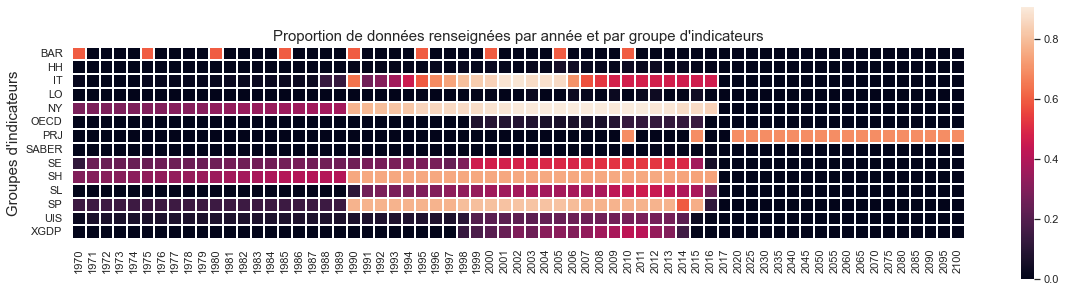

In [16]:
print("On remarque que le groupe 'BAR' est aggloméré tous les 5 ans avec un bon taux de remplissage,")
print("et que tous les indicateurs ne sont pas exploitable sur la période 2005-2017.")
print()
print("Nous garderons donc les indicateurs BAR, IT, NY, SE, SH, SL, SP, UIS et XGDP.")
newdata5 = newdata2.groupby(['A']).mean()
fig = plt.figure(figsize=(20,5))
sns.heatmap(newdata5, square=True, linewidths=0.1)
plt.title("Proportion de données renseignées par année et par groupe d'indicateurs", fontsize=15)
plt.ylabel('Groupes d\'indicateurs', fontsize=15)
plt.show()

# 1. Nettoyage des données

In [17]:
# Colonne supplémentaire apparue lorsqu'on lit un fichier csv via pandas
data.drop(columns='Unnamed: 69', inplace=True)

## 1.1 Exclusion des régions

In [18]:
# filtre 1 : 886 930 => 795 305
df1 = data[data['Country Name'].isin(country_list)]
print("Nous avons exclus du dataframe les {} regions.".format(len(region_list)))

Nous avons exclus du dataframe les 25 regions.


## 1.2 Définition de critères minimum à respecter

### Nombre minimal de données par pays

Le graphique est toujours sur la base de l'ensemble des données entre 1970 et 2100, et n'est que la première partie pour se rendre compte du nombre de données par pays. Les données par régions ont bien été exclues.

L'hypothèse est que ce sont les pays ayant le moins d'habitant qui recensent le moins de données, verifions cela :


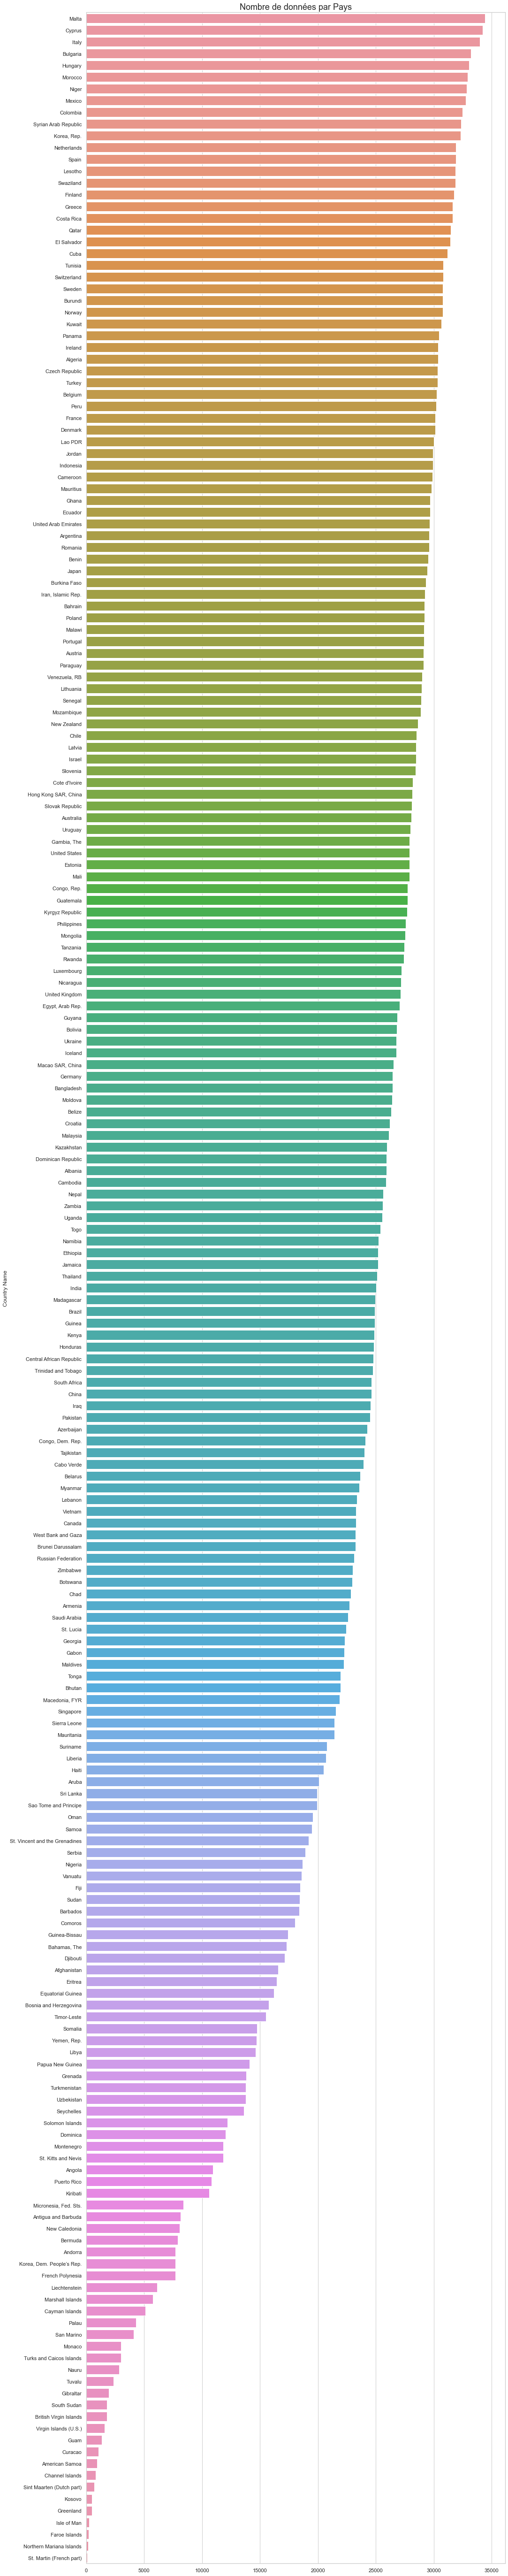

In [19]:
# Tableau agglomérant le nombre de données disponible par pays
fill1 = df1.drop(columns=['Country Code','Indicator Name','Indicator Code'])
fill2 = fill1.groupby('Country Name').count().sum(axis=1)
fill3 = fill2.to_frame().reset_index()

# Nombre de données par pays
sns.set(style="whitegrid")
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays', size=18)
plot = sns.barplot(x = df1.groupby('Country Name')[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']].count().sum(axis=1).sort_values(ascending=False).values,
                   y = df1.groupby('Country Name')[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100']].count().sum(axis=1).sort_values(ascending=False).index)

print("L'hypothèse est que ce sont les pays ayant le moins d'habitant qui recensent le moins de données, verifions cela :")
plt.show()

### Nombre d'habitants minimum

Désormais, les données dans "filldata_and_population" ont pour colonnes :
- les pays
- la somme des données les plus récentes depuis 2005
- la population totale

In [20]:
# Appliquer l'indicateur population mondiale au dataframe
df1_mask_pop = df1[df1['Indicator Code'] == 'SP.POP.TOTL']
pop_filter_1 = df1_mask_pop[['Country Name','2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
pop_filter_2 = pop_filter_1.fillna(value={"2008":0})
pop_filter_3 = pop_filter_2.fillna(method='ffill',axis=1)
pop_2005_2017 = pop_filter_3[['Country Name', '2017']]
pop_2005_2017 = pop_2005_2017.rename(columns={'2017': 'pop_value'})

Puis on représente le nombre de données en fonction de la population pour mieux voir les tendances et le lien entre les 2 indicateurs.

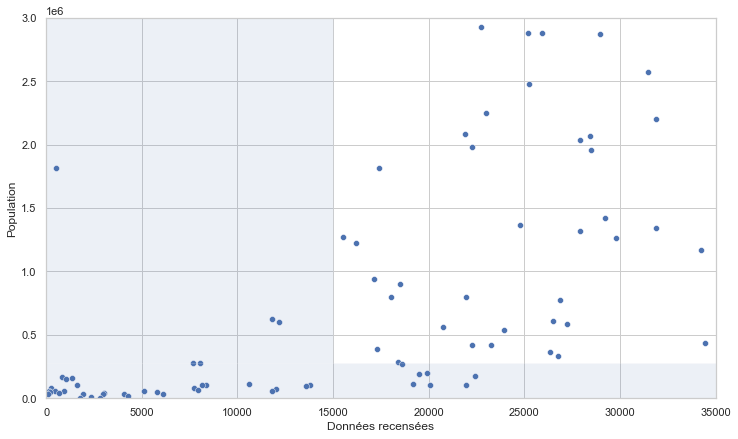

In [21]:
#Merge des données de population et de taux de remplissage pour visualiser les 2 sur un graphique
filldata_and_population = pd.merge(pop_2005_2017,fill3).set_axis(['Country Name', 'pop_value', 'value_count'], axis = 1).sort_values(by='pop_value', ascending=False)

#Création du graphique
plt.figure(figsize=(12, 7))
ax = plt.gca()
sns.set(style="whitegrid")
sns.scatterplot(data=filldata_and_population,x='value_count',y='pop_value')
plt.xlim(0,35000)
plt.ylim(0,3e6)
plt.xlabel('Données recensées')
plt.ylabel('Population')
ax.add_patch(patches.Rectangle((0, 0), 35000, 0.28e6, alpha=0.1))
ax.add_patch(patches.Rectangle((0, 0.28e6), 15000, 1e9, alpha=0.1))
plt.show()

### Richesse minimale

Enfin, on ajoute aux 2 colonnes la dimension de richesse par habitant. Les 0 sont des données manquantes donc faussent la mesure du premier quartile.

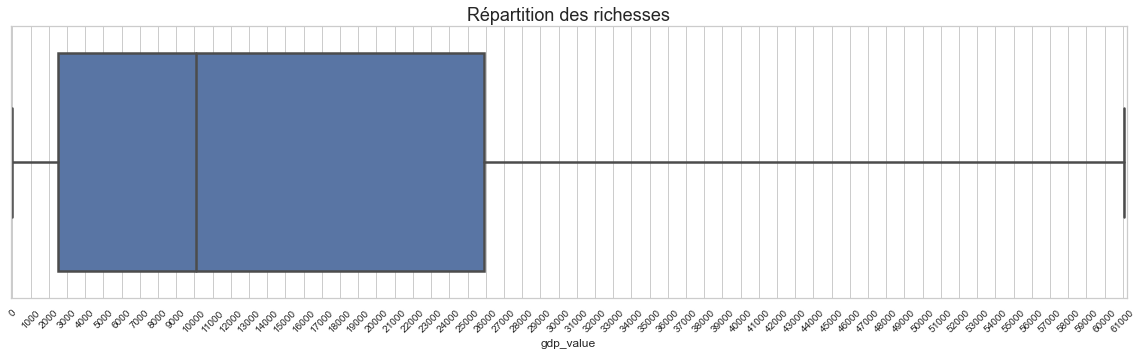

In [22]:
df1_mask_gdp = df1[df1['Indicator Name'] == 'GDP per capita, PPP (current international $)']
gdp_filter_1 = df1_mask_gdp[['Country Name','2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
gdp_filter_2 = gdp_filter_1.fillna(value={"2008":0})
gdp_filter_3 = gdp_filter_2.fillna(method='ffill',axis=1)
gdp_2005_2017 = gdp_filter_3[['Country Name', '2017']]
gdp_2005_2017 = gdp_2005_2017.rename(columns={'2017': 'gdp_value'})
gdp_pop_fill = pd.merge(filldata_and_population,gdp_2005_2017).set_axis(['Country Name', 'pop_value', 'value_count','gdp_value'], axis = 1)
gdp_pop_fill.index = gdp_pop_fill['Country Name']
gdp_pop_fill = gdp_pop_fill[['pop_value', 'value_count','gdp_value']].astype(int)
gdp_pop_fill = gdp_pop_fill.reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))
plt.title('Répartition des richesses', size=18)
plt.xlim(-100,61200)
plt.xticks(np.arange(0, 61200, 1000), rotation=45, size=10)
sns.boxplot(x='gdp_value', data=gdp_pop_fill, linewidth=2.5, orient='h')
plt.show()

### Rechercher un pays en particulier :

Il s'agit du pays que j'ai choisi de sélectionner comme le plus petit pays valide en terme de population, au vu du niveau de vie général 

In [23]:
gdp_pop_fill[gdp_pop_fill['Country Name'] == 'Bahamas, The']

,Country Name,pop_value,value_count,gdp_value
173,"Bahamas, The",391232,17298,22560


### Supprimer les pays de moins de :
- 15 000 données (Seuil en dessous duquel les pays sont trop petits ou aux infrastructures insuffisantes)
- 280 000 habitants (Seuil en dessous duquel il manque beaucoup de données)
- 2 482 $ de revenu par habitant (premier quartile)

In [25]:
#Population
pop_over_280kh = filldata_and_population[filldata_and_population['pop_value'] >= 0.28e6]
over_280kh = pop_over_280kh['Country Name']

# Données
data_over_12kd = filldata_and_population[filldata_and_population['value_count'] >= 15000]
over_15kd = data_over_12kd['Country Name']

#Liste des pays répondant aux 3 critères
countries = gdp_pop_fill[(gdp_pop_fill['value_count'] > 15000) & (gdp_pop_fill['pop_value'] > 0.28e6) & (gdp_pop_fill['gdp_value'] > 2482)]['Country Name'].values

#Résultat
print("Nous avons retenus {} pays comptant plus de 100 000 habitants,".format(len(over_280kh)))
print("et {} ayant plus de 200 données, soit {} pays repondant à ces 2 critères.".format(len(over_15kd),len(countries)))

# filtre 2 : 795 305 => 491 110
df2 = df1[df1['Country Name'].isin(countries)]
df2.shape

Nous avons retenus 178 pays comptant plus de 100 000 habitants,
et 171 ayant plus de 200 données, soit 134 pays repondant à ces 2 critères.


(491110, 69)

## 1.4 Définition d'une plage d'années

Sur le précédent graphique, on a pu constater un nombre conséquent de données depuis 1999 et l'arrivée d'internet.
 
Afin d'assurer l'utilisation de données relativement récentes et sachant qu'il n'y a quasiment pas de données exploitables sur 2016 et 2017, nous allons nous concentrer sur la période 2005-2015, et éventuellement les quelques donnés renseignées sur 2016-2017.

In [26]:
# Filtre de données entières entre 2005 et 2017
only_date = df2[['2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
reste_date = df2[['Country Name','Country Code','Indicator Name','Indicator Code']]

# Associer à l'année 2017 les valeurs les plus récentes possible sur 12 dernières années :
# filtre 4 : columns 70 => 5
date1 = only_date.fillna(method='ffill',axis=1)
df3 = reste_date.join(date1['2017'])

# Renommer '2017' par 'definitive_value'
df3 = df3.rename(columns = {'2017':'definitive_value'})
df3.shape

(491110, 5)

# 2. Selection des indicateurs

## 2.1 Exclusion des groupes d'indicateurs non pertinents

Nous créons ensuite une liste contenant uniquement les groupes d'indicateurs suffisamment remplis sur la période et appliquons la condition 'seuls les indicateurs apparaissant dans cette liste sont conservés'.

In [27]:
# Indicateurs pré-selectionnés
indic_type = ["BAR", "IT", "NY", "SE", "SH", "SL", "SP", "UIS", "XGDP"]

ind_type2 = df3['Indicator Code'].str.split('.', n=1, expand=True).drop(columns=(1))
ind_type2.set_axis(["Indicator Group"], axis=1, inplace=True)
ind_type2

# filtre 4 : 491 110 => 245 220
df4 = [ind_type2, df3]
df4 = pd.concat(df4, axis=1, join="outer")
df4 = df4[df4['Indicator Group'].isin(indic_type)]
df4 = df4.drop("Indicator Group", axis=1)
df4.shape

(245220, 5)

## 2.2 Fonction de recherche des indicateurs par mot-clé

Nous utilisons ici une fonction de recherche par mot-clé pour faire une première séléction sémantique des indicateurs potentiellement intéressants pour la problématique. Cela permet également d'avoir une première approche sur tous les indicateurs existants et juger leur utilité potentielle.

In [28]:
indicators_in_subcategory =  df3['Indicator Name'].unique()
preselec = []

def SearchKeyword(s):
    for indicator in indicators_in_subcategory:
        if s in indicator:
            preselec.append(indicator)

SearchKeyword('Literacy rate, population')
print(preselec)

liste_keyword = ['computer','enrolment','8th Grade','Grade','Secondary completion','out-of-school','Population','tertiary','upper secondary','Young adults','expenditure','School census','GDP','student','Literacy','illiterate','attendance','education','technology','Numeracy','Private Sector']
print("J'ai recherché les mots : {}.".format(", ".join(str(m) for m in liste_keyword)))

['Literacy rate, population 25-64 years, both sexes (%)', 'Literacy rate, population 25-64 years, female (%)', 'Literacy rate, population 25-64 years, gender parity index (GPI)', 'Literacy rate, population 25-64 years, male (%)']
J'ai recherché les mots : computer, enrolment, 8th Grade, Grade, Secondary completion, out-of-school, Population, tertiary, upper secondary, Young adults, expenditure, School census, GDP, student, Literacy, illiterate, attendance, education, technology, Numeracy, Private Sector.


## 2.3 Stockage des indicateurs

A partir de la fonction plus haut, je copie-colle tous les indicateurs comprenant les mots-clés recherchés dans la liste ci-dessous.

In [29]:
ind_retenus = [
'Population, ages 15-24, total',
'Population, age 15, total',
'Population, age 16, total',
'Population, age 17, total',
'Population, age 18, total',
'Population, age 19, total',
'Population, age 20, total',
'Population, age 21, total',
'Population, age 22, total',
'Population, age 23, total',
'Population, age 24, total',
'Population, total',
'Population growth (annual %)',
'Enrolment in post-secondary non-tertiary education, both sexes (number)',
'Enrolment in tertiary education, all programmes, both sexes (number)',
'Enrolment in upper secondary education, both sexes (number)',
'Population, ages 10-15, total',
'TIMSS: Distribution of 8th Grade Mathematics Scores: 10th Percentile Score',
 'TIMSS: Distribution of 8th Grade Mathematics Scores: 25th Percentile Score',
 'TIMSS: Distribution of 8th Grade Mathematics Scores: 50th Percentile Score',
 'TIMSS: Distribution of 8th Grade Mathematics Scores: 5th Percentile Score',
 'TIMSS: Distribution of 8th Grade Mathematics Scores: 75th Percentile Score',
 'TIMSS: Distribution of 8th Grade Mathematics Scores: 90th Percentile Score',
 'TIMSS: Distribution of 8th Grade Mathematics Scores: 95th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 10th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 25th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 50th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 5th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 75th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 90th Percentile Score',
 'TIMSS: Distribution of 8th Grade Science Scores: 95th Percentile Score',
 'DHS: Gross attendance rate. Post Secondary',
 'DHS: Gross attendance rate. Post Secondary. Rural',
 'DHS: Gross attendance rate. Post Secondary. Urban',
 'DHS: Net attendance rate. Secondary',
 'DHS: Typology of out-of-school children. Primary. Dropped out',
 'DHS: Secondary completion rate',
 'DHS: Secondary completion rate. Quintile 1',
 'DHS: Secondary completion rate. Quintile 2',
 'DHS: Secondary completion rate. Quintile 3',
 'DHS: Secondary completion rate. Quintile 4',
 'DHS: Secondary completion rate. Quintile 5',
 'DHS: Secondary completion rate. Rural',
 'DHS: Secondary completion rate. Urban',
 'DHS: Typology of out-of-school children. Primary. Never in school',
 'DHS: Typology of out-of-school children. Primary. Never in school. Quintile 1',
 'DHS: Typology of out-of-school children. Primary. Never in school. Quintile 2',
 'DHS: Typology of out-of-school children. Primary. Never in school. Quintile 3',
 'DHS: Typology of out-of-school children. Primary. Never in school. Quintile 4',
 'DHS: Typology of out-of-school children. Primary. Never in school. Quintile 5',
 'DHS: Typology of out-of-school children. Primary. Never in school. Rural',
 'DHS: Typology of out-of-school children. Primary. Never in school. Urban',
 'Personal computers (per 100 people)',
 'PIAAC: Mean Young Adult Literacy Proficiency. Total',
 'PIAAC: Mean Adult Literacy Proficiency. Total',
 'PIAAC: Mean Adult Literacy Proficiency. Total',
 'PIAAC: Mean Adult Numeracy Proficiency. Total',
 'PIAAC: Mean Young Adult Numeracy Proficiency. Total',
 'PIAAC: Distribution of Adult Literacy Scores: 50th Percentile Score',
 'PIAAC: Young adults by literacy proficiency level (%). Below Level 1',
 'DHS: Average years of schooling by age group. Age 15-19',
 'PIAAC: Young adults by literacy proficiency level (%). Level 1',
 'PIAAC: Young adults by literacy proficiency level (%). Level 2',
 'PIAAC: Young adults by literacy proficiency level (%). Level 3',
 'PIAAC: Young adults by literacy proficiency level (%). Level 4 & 5',
 'PIAAC: Young adults by numeracy proficiency level (%). Below Level 1',
 'PIAAC: Young adults by numeracy proficiency level (%). Level 1',
 'PIAAC: Young adults by numeracy proficiency level (%). Level 2',
 'PIAAC: Young adults by numeracy proficiency level (%). Level 3',
 'PIAAC: Young adults by numeracy proficiency level (%). Level 4 & 5',
 'Out-of-school youth of upper secondary school age, both sexes (number)',
 'Share of youth not in education, employment, or training, total (% of youth population)',
 'Gross enrolment ratio, upper secondary, both sexes (%)',
 'Gross enrolment ratio, tertiary, both sexes (%)',
 'Gross enrolment ratio, primary to tertiary, both sexes (%)MICS: Average years of schooling by age group. Age 15-19. Urban',
 'MICS: Average years of schooling by age group. Age 15-19. Rural',
 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)',
 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
 'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)',
 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary',
 'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
 'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary',
 'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
 'Youth illiterate population, 15-24 years, both sexes (number)',
 'Percentage of students in upper secondary education enrolled',
 'Internet users (per 100 people)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Literacy Rate for Population age 15 and over (in % of total population)',
 'DHS: Net attendance rate. Secondary',
 'MICS: Gross attendance rate. Post Secondary',
 'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
 'Enrolment in upper secondary general, both sexes (number)',
 'Rate of out-of-school youth of upper secondary school age, both sexes (%)',
 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Below Level 1',
 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 1',
 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 2',
 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Level 3',
 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test',
 'PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment',
 'GDP at market prices (current US$)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (current international $)',
 'Government expenditure in educational institutions as % of GDP (%)',
 'Government expenditure in post-secondary non-tertiary institutions as % of GDP (%)',
 'Government expenditure in secondary institutions education as % of GDP (%)',
 'Government expenditure in tertiary institutions as % of GDP (%)',
 'Government expenditure on education as % of GDP (%)',
 'Government expenditure on post-secondary non-tertiary education as % of GDP (%)',
 'Government expenditure on secondary and post-secondary non-tertiary vocational education as % of GDP (%)',
 'Government expenditure on secondary education as % of GDP (%)',
 'Government expenditure on tertiary education as % of GDP (%)',
 'Government expenditure per post-secondary non-tertiary student as % of GDP per capita (%)',
 'Government expenditure per secondary student as % of GDP per capita (%)',
 'Government expenditure per tertiary student as % of GDP per capita (%)',
 'Government expenditure per upper secondary student as % of GDP per capita (%)',
 'Africa Dataset: School census return rate from secondary schools']

# Filtre uniquement avec les indicateurs préselectionnés
# filtre 5 : 245 220 => 7 236
mask_indicator = df4['Indicator Name'].isin(ind_retenus)
df5 = df4[mask_indicator]
print("Nous avons pré-sélectionné {} indicateurs.".format(len(df5['Indicator Name'].unique())))
df5.shape

Nous avons pré-sélectionné 56 indicateurs.


(7504, 5)

## + Ajouter les régions par pays

In [30]:
df5_country = df5.merge(country[['Country Code', 'Region']], on='Country Code')
df5_country.shape

(7504, 6)

## 2.4 Passer les indicateurs en colonne

In [31]:
#filtre 6 : 7 236  => 134 pays x 56 indicateurs
df6 = df5_country.pivot (index = ['Region','Country Name'], columns = 'Indicator Name', values = ['definitive_value'])
df6.rename(columns={'Country Name':'Country'}, inplace=True)
df6.shape

(134, 56)

### + Enlever le niveau '2017' en trop

In [113]:
# filtre 7 : 134 pays x 56 indicateurs
inverted2 = df6.T
inverted2.index = inverted2.index.droplevel(0)
df7 = inverted2.T
df7.shape

(134, 56)

## 2.5 Créer une whitelist selon la corrélation des indicateurs

Pour déterminer la corrélation entre les indicateurs, j'ai identifié manuellement ceux qui répondaient à la même problématique ou ayant la même utilité première. J'ai également vérifié si mes hypothèses étaient fondées en produisant un tableau heatmap avec la méthode "corr".

In [34]:
#Exclusion des indicateurs corrélés
whitelist = [
'GDP per capita, PPP (current international $)',
'Government expenditure on education as % of GDP (%)',
'Gross enrolment ratio, tertiary, both sexes (%)',
'Gross enrolment ratio, upper secondary, both sexes (%)',
'Internet users (per 100 people)',
'Population, ages 15-24, total',
'Population, total',
'Population growth (annual %)',
'Population, ages 10-15, total',
'Population, age 15, total',
'Population, age 16, total',
'Population, age 17, total',
'Population, age 18, total',
'Population, age 19, total',
'Population, age 20, total',
'Population, age 21, total',
'Population, age 22, total',
'Population, age 23, total',
'Population, age 24, total',
]

# Afficher les indicateurs exclus
blacklist = [
              'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
              'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
              'Enrolment in upper secondary general, both sexes (number)',
              'Government expenditure on education as % of GDP (%)',
              'Government expenditure on secondary education as % of GDP (%)',
              'Government expenditure on tertiary education as % of GDP (%)',
              'Gross enrolment ratio, tertiary, both sexes (%)',
              'Gross enrolment ratio, upper secondary, both sexes (%)',
              'Out-of-school youth of upper secondary school age, both sexes (number)',
              'Youth illiterate population, 15-24 years, both sexes (number)',
              'Adult literacy rate, population 15+ years, both sexes (%)',
              'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
              'Barro-Lee: Percentage of population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)',
              'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary',
              'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Completed Tertiary',
              'Barro-Lee: Percentage of population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
              'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)',
              'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Completed Tertiary',
              'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
              'Enrolment in tertiary education, all programmes, both sexes (number)',
              'Enrolment in upper secondary education, both sexes (number)',
              'GDP at market prices (current US$)',
              'GDP per capita (current US$)',
              'GDP, PPP (current international $)',
              'Government expenditure in educational institutions as % of GDP (%)',
              'Government expenditure in secondary institutions education as % of GDP (%)',
              'Government expenditure in tertiary institutions as % of GDP (%)',
              'Government expenditure per secondary student as % of GDP per capita (%)',
              'Government expenditure per tertiary student as % of GDP per capita (%)',
              'Rate of out-of-school youth of upper secondary school age, both sexes (%)',
           'Government expenditure on secondary education as % of GDP (%)',
       'Government expenditure on tertiary education as % of GDP (%)',
     'Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)',
       'Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary)',
           'Enrolment in upper secondary general, both sexes (number)',
           'Out-of-school youth of upper secondary school age, both sexes (number)',
       'Population growth (annual %)',
       'Youth illiterate population, 15-24 years, both sexes (number)',
       'Personal computers (per 100 people)',
           'DHS: Gross attendance rate. Post Secondary'
            ]

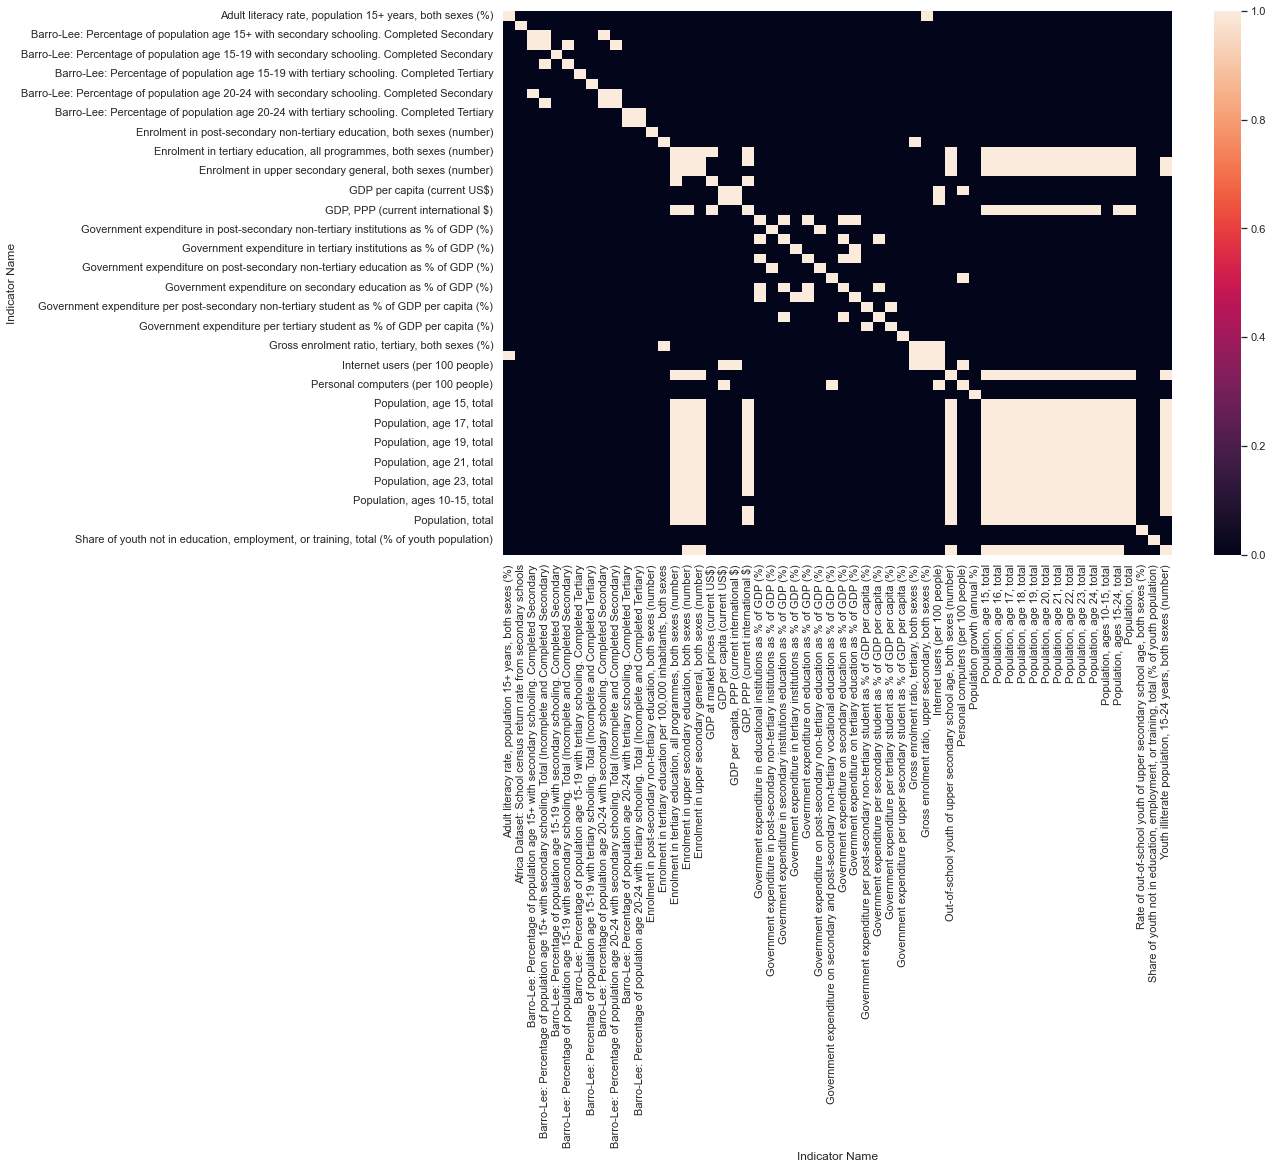

In [35]:
plt.figure(figsize=(15, 10))
sns.heatmap(df7.corr() > 0.7);

## 2.6 Identifier les meilleurs indicateurs parmis ceux étant corrélés

Boucle affichant le taux de remplissage des indicateurs rentrés, je choisis le meilleur parmis eux.

In [36]:
correlated_indicators = [
'Government expenditure in tertiary institutions as % of GDP (%)',
'Government expenditure on tertiary education as % of GDP (%)',
'Government expenditure per tertiary student as % of GDP per capita (%)',
                        ]

for indicator in correlated_indicators:
    print(df7[indicator].isna().sum())

24
20
26


## 2.7 Exclusion des indicateurs ayant moins de 70% de remplissage

In [37]:
#filtre 8 : 134 pays x 56 indicateurs => 134 pays x 46 indicateurs
df8 = df7.drop(df7.columns[df7.isna().mean() > 0.2], axis=1)
df8.shape

(134, 46)

## 2.8 Garder uniquement les indicateurs qui vont m'être utile

In [38]:
#filtre 9 : 46 => 19
df9 = df8.loc[:,df8.columns.isin(whitelist)]
df9.shape

(134, 19)

## 2.9 Construction des indicateurs finaux

In [39]:
# Opération d'imputation par la moyenne pour tous les indicateurs
for indicateur in df9:
    df9.loc[df9[indicateur].isna(),indicateur] = df9[indicateur].mean()

### Population

J'ai décidé de garder plusieurs indicateurs de population pour pouvoir pondérer et ajuster les indicateurs existants.

- Population de 15 à 24 ans
- Population, ages 10-15, total
- Population, ages 15-24, total

In [40]:
#COLLÈGE-----------------------------------------------------------------------------------------------------------------------

# La prochaine population étudiante
df9['Population, ages 10-15, total']

#LYCEE-----------------------------------------------------------------------------------------------------------------------

# Population totale ayant l'age d'être au lycée
df9['15-18'] = df9['Population, age 15, total']+df9['Population, age 16, total']+df9['Population, age 17, total']+df9['Population, age 18, total']

# Nombre de lycéens scolarisés
df9['Lycéens'] = df9['15-18']*df9['Gross enrolment ratio, upper secondary, both sexes (%)']/100

#ÉTUDES SUPÉRIEURES------------------------------------------------------------------------------------------------------------------------

# Population totale ayant l'age d'être en études supérieures
df9['19-24'] = df9['Population, age 19, total']+df9['Population, age 20, total']+df9['Population, age 21, total']+df9['Population, age 22, total']+df9['Population, age 23, total']+df9['Population, age 24, total']
# Nombre d'étudiants du supérieurs scolarisés
df9['Étudiants du Supérieur'] = df9['19-24']*df9['Gross enrolment ratio, tertiary, both sexes (%)']/100

#CIBLE------------------------------------------------------------------------------------------------------------------------

# Population ayant l'âge de notre cible
df9['Population, ages 15-24, total']

# Notre population cible
df9['Population Étudiante'] = df9['Étudiants du Supérieur']+df9['Lycéens']

### Jeunes connectés

Je souhaite connaître le nombre d'étudiants connectés à internet afin d'avoir un potentiel de clients. Je vais donc mélanger :
- Population Étudiante
- Internet users (per 100 people)

In [41]:
# Nombre d'étudiants connectés
df9['Utilisateur Internet en %'] = df9['Internet users (per 100 people)']
df9['Étudiants Connectés'] = df9['Utilisateur Internet en %']/100*df9['Population Étudiante']
df9['Étudiants Connectés en part'] = df9['Étudiants Connectés']/df9['Étudiants Connectés'].sum()

### Scolarisation moyenne en %

Je souhaite cumuler le nombre d'étudiants scolarisés dans le supérieur et au lycée, transformant ce chiffre en %. Pour cela, je pondère la tranche 15-18 de 6/4 pour égaliser le poids avec la tranche 19-24, puis je fais la moyenne des 2 pourcentages.
- Gross enrolment ratio, tertiary, both sexes (%)
- Gross enrolment ratio, upper secondary, both sexes (%)
- Étudiants du Supérieur
- Lycéens
- 15-18
- 19-24

In [42]:
# Moyenne de scolarisation des 15-24 ans
df9['Scolarisation Moyenne en %'] = (df9['Étudiants du Supérieur']/df9['19-24'])+(6/4*df9['Lycéens']/df9['15-18'])/2

### Taux de remplacement des 15-24 en %

Il s'agit d'avoir le pourcentage de remplacement de la population 15-24 par la population 10-15 ans. Utiliser cette méthode permet de ne pas avoir à estimer par régression linéaire l'évolution de la population 15-24 puisqu'on possède déjà les données pour le savoir. Reste à ré-équilibrer les tranches d'âge puisqu'une d'elle est étalée sur 5 ans et l'autre sur 9. On va donc appliquer 9/5 à la tranche la plus faible.
- Population, ages 10-15, total
- Population, ages 15-24, total

In [43]:
# Taux de remplacement des 15-24 ans
df9['Taux de remplacement des 15-24 ans'] = 100*(((9/5)*df9['Population, ages 10-15, total'])-df9['Population, ages 15-24, total'])/df9['Population, ages 15-24, total']

### Reste des indicateurs : renommage
Le PIB par habitant en parité de pouvoir d'achat est la mesure la plus juste de richesse de la population. Elle permet de cibler les populations pouvant acheter notre solution. L'investissement public dans l'éducation représente l'effort de l'État pour l'éducation. C'est pour nous le taux d'espérance de partenariats et aides potentiels.

- GDP per capita, PPP (current international $)
- Government expenditure on education as % of GDP (%)

In [44]:
#PIB par habitant en PPA
df9['PIB par habitant en PPA'] = df9['GDP per capita, PPP (current international $)']

# Investissement public dans l'éducation en % du PIB
df9["Investissement public dans l'éducation en % du PIB"] = df9['Government expenditure on education as % of GDP (%)']

### Nettoyage du dataframe

In [45]:
# On supprime les colonnes désormais inutiles
df10 = df9.drop(['Government expenditure on education as % of GDP (%)',
                  'Étudiants du Supérieur',
                  'Population growth (annual %)',
                  'Étudiants Connectés en %',
                  'GDP per capita, PPP (current international $)',
                  'Gross enrolment ratio, upper secondary, both sexes (%)',
                  'Gross enrolment ratio, tertiary, both sexes (%)',
                  'Tertiary Population','Upper Secondary Population',
                  'Internet users (per 100 people)',
                  'Utilisateur Internet en %',
                  'Étudiants Connectés',
                  'Population, age 16, total',
                  'Population, age 15, total',
                  'Population, age 17, total','Population, age 18, total',
                  'Population, age 19, total','Population, age 20, total',
                  'Population, age 21, total','Population, age 22, total',
                  'Population, age 23, total',
                  'Population, age 24, total',
                  'Population, ages 10-15, total',
                  'Population, ages 15-24, total',
                  '15-18','19-24',
                  'Lycéens'], axis=1, errors='ignore')

# 3. Exclusion des pays selon plusieurs critères

##  3.1 Pays aux taux de remplissage supérieurs à 80%

Comme j'ai déjà imputé par la moyenne les indicateurs afin d'avoir un total des parts égal à 1, la sélection va se faire sur les pays du dataframe 8 et non 10.

In [47]:
# filtre 10 :134 pays => 115 pays
inverted_df8 = df8.T
drop_country_na = inverted_df8.drop(inverted_df8.columns[inverted_df8.isna().mean() > 0.2], axis=1)
drop_country_na = drop_country_na.T
country_selected = drop_country_na.index.get_level_values(1).tolist()
mask_na = df10.index.get_level_values(1).isin(country_selected)
df11 = df10[mask_na]

## 3.2 Pourcentage minimal d'étudiants

Nous allons maintenant utiliser describe pour trouver et éliminer le quartile de pays ayant le moins d'étudiants, afin d'appliquer un filtre quantitatif de population.

In [48]:
(df11['Population Étudiante']/df11['Population, total']*100).describe()

count    115.000000
mean       8.840238
std        3.057102
min        1.063124
25%        7.247206
50%        8.746425
75%       10.827066
max       17.397203
dtype: float64

Également, nous enlevons le reste des indicateurs de population désormais inutiles.

In [114]:
# pays ayant une population étudiante inférieure à 7,24%
mask_2 = df11['Population Étudiante']/df11['Population, total']*100 >= 7.247206

#filtre 12 : 115 pays => 86 pays
df_final = df11[mask_2].drop(['Population Étudiante','Population, total'], axis=1)
df_final.shape

(86, 5)

# 4. Représentation graphique pour chaque indicateur



## 4.1 Jeunes connectés (internet, population étudiante)

### Par pays

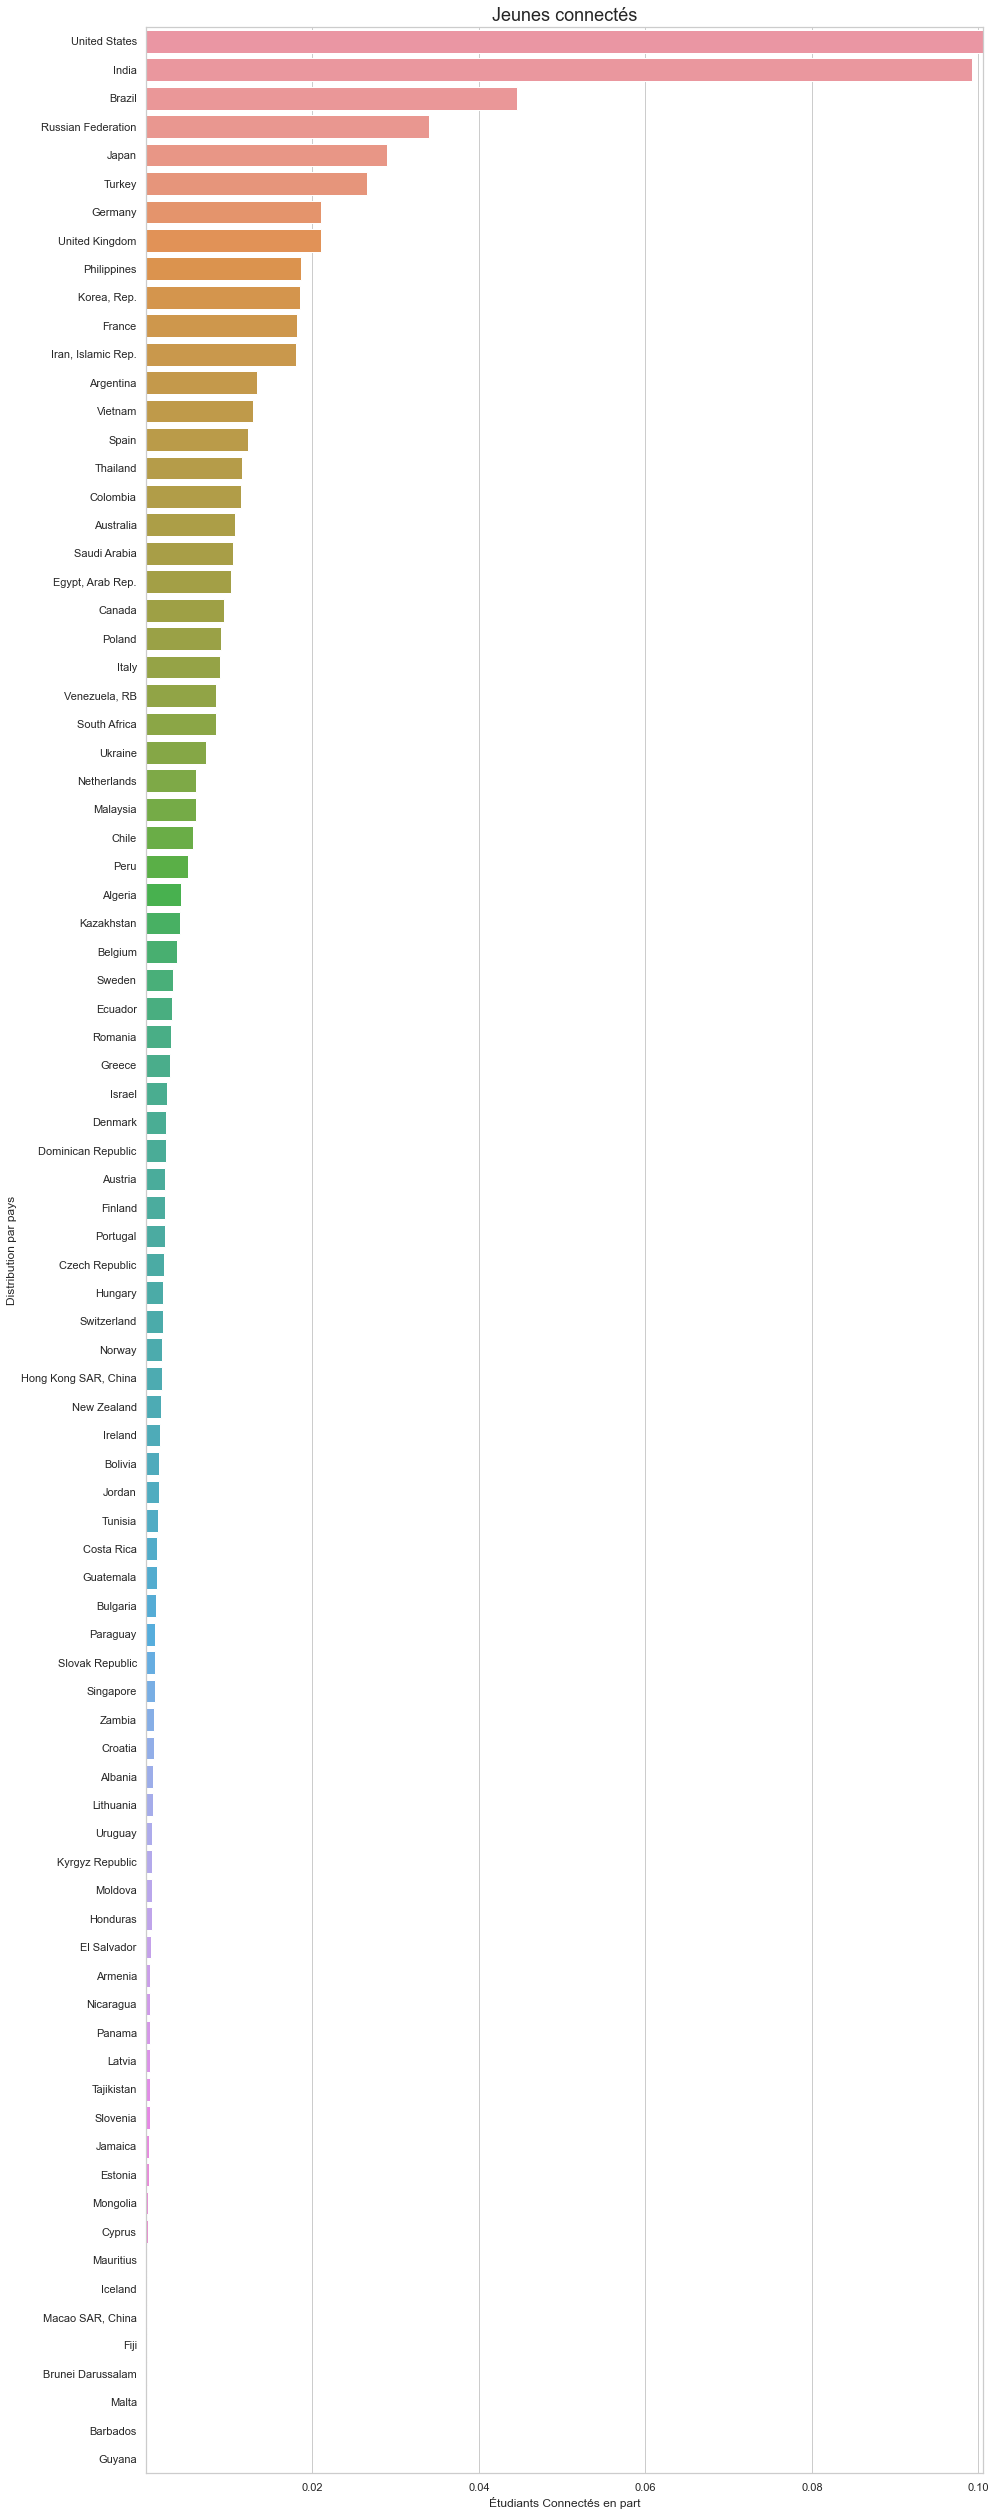

In [50]:
jeunes_connectes = df_final.reset_index().drop(columns=[
'Taux de remplacement des 15-24 ans',
'Scolarisation Moyenne en %',
'PIB par habitant en PPA',
"Investissement public dans l'éducation en % du PIB"
])
jeunes_connectes.set_axis(['Région','Distribution par pays','Étudiants Connectés en part'], axis=1, inplace=True)
jeunes_connectes_2 = jeunes_connectes.sort_values(['Étudiants Connectés en part'], ascending=False).reset_index(drop=True)
y= jeunes_connectes_2['Distribution par pays']
x= jeunes_connectes_2['Étudiants Connectés en part']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))
plt.xlim(jeunes_connectes[jeunes_connectes['Distribution par pays'] =='Guyana']['Étudiants Connectés en part'].item(),jeunes_connectes[jeunes_connectes['Distribution par pays'] =='United States']['Étudiants Connectés en part'].item())
plt.title('Jeunes connectés', size=18)
plot2 = sns.barplot(data=jeunes_connectes_2, x=x, y=y, orient='h')
plt.show()

### Par région

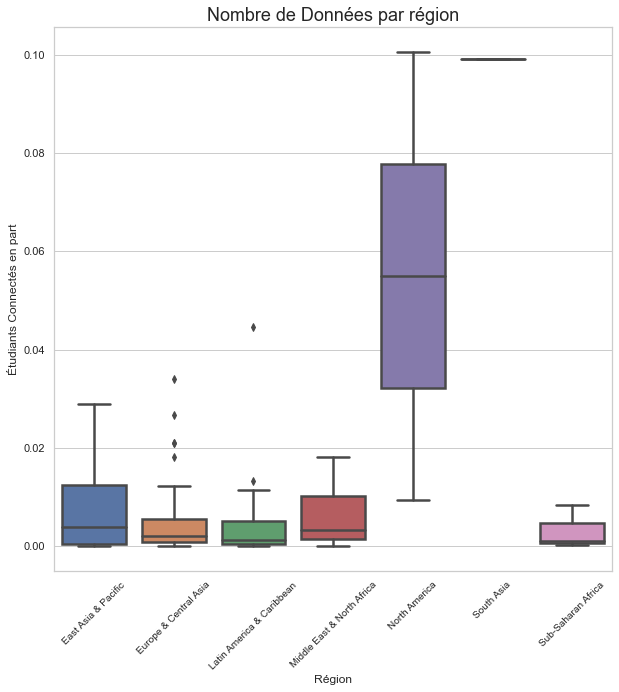

In [51]:
GraphBoxplot(jeunes_connectes, 'Nombre de Données par région','Étudiants Connectés en part','Région')

## 4.2 Propension à l'achat (PIB, pouvoir d'achat, par habitant)

### Par pays

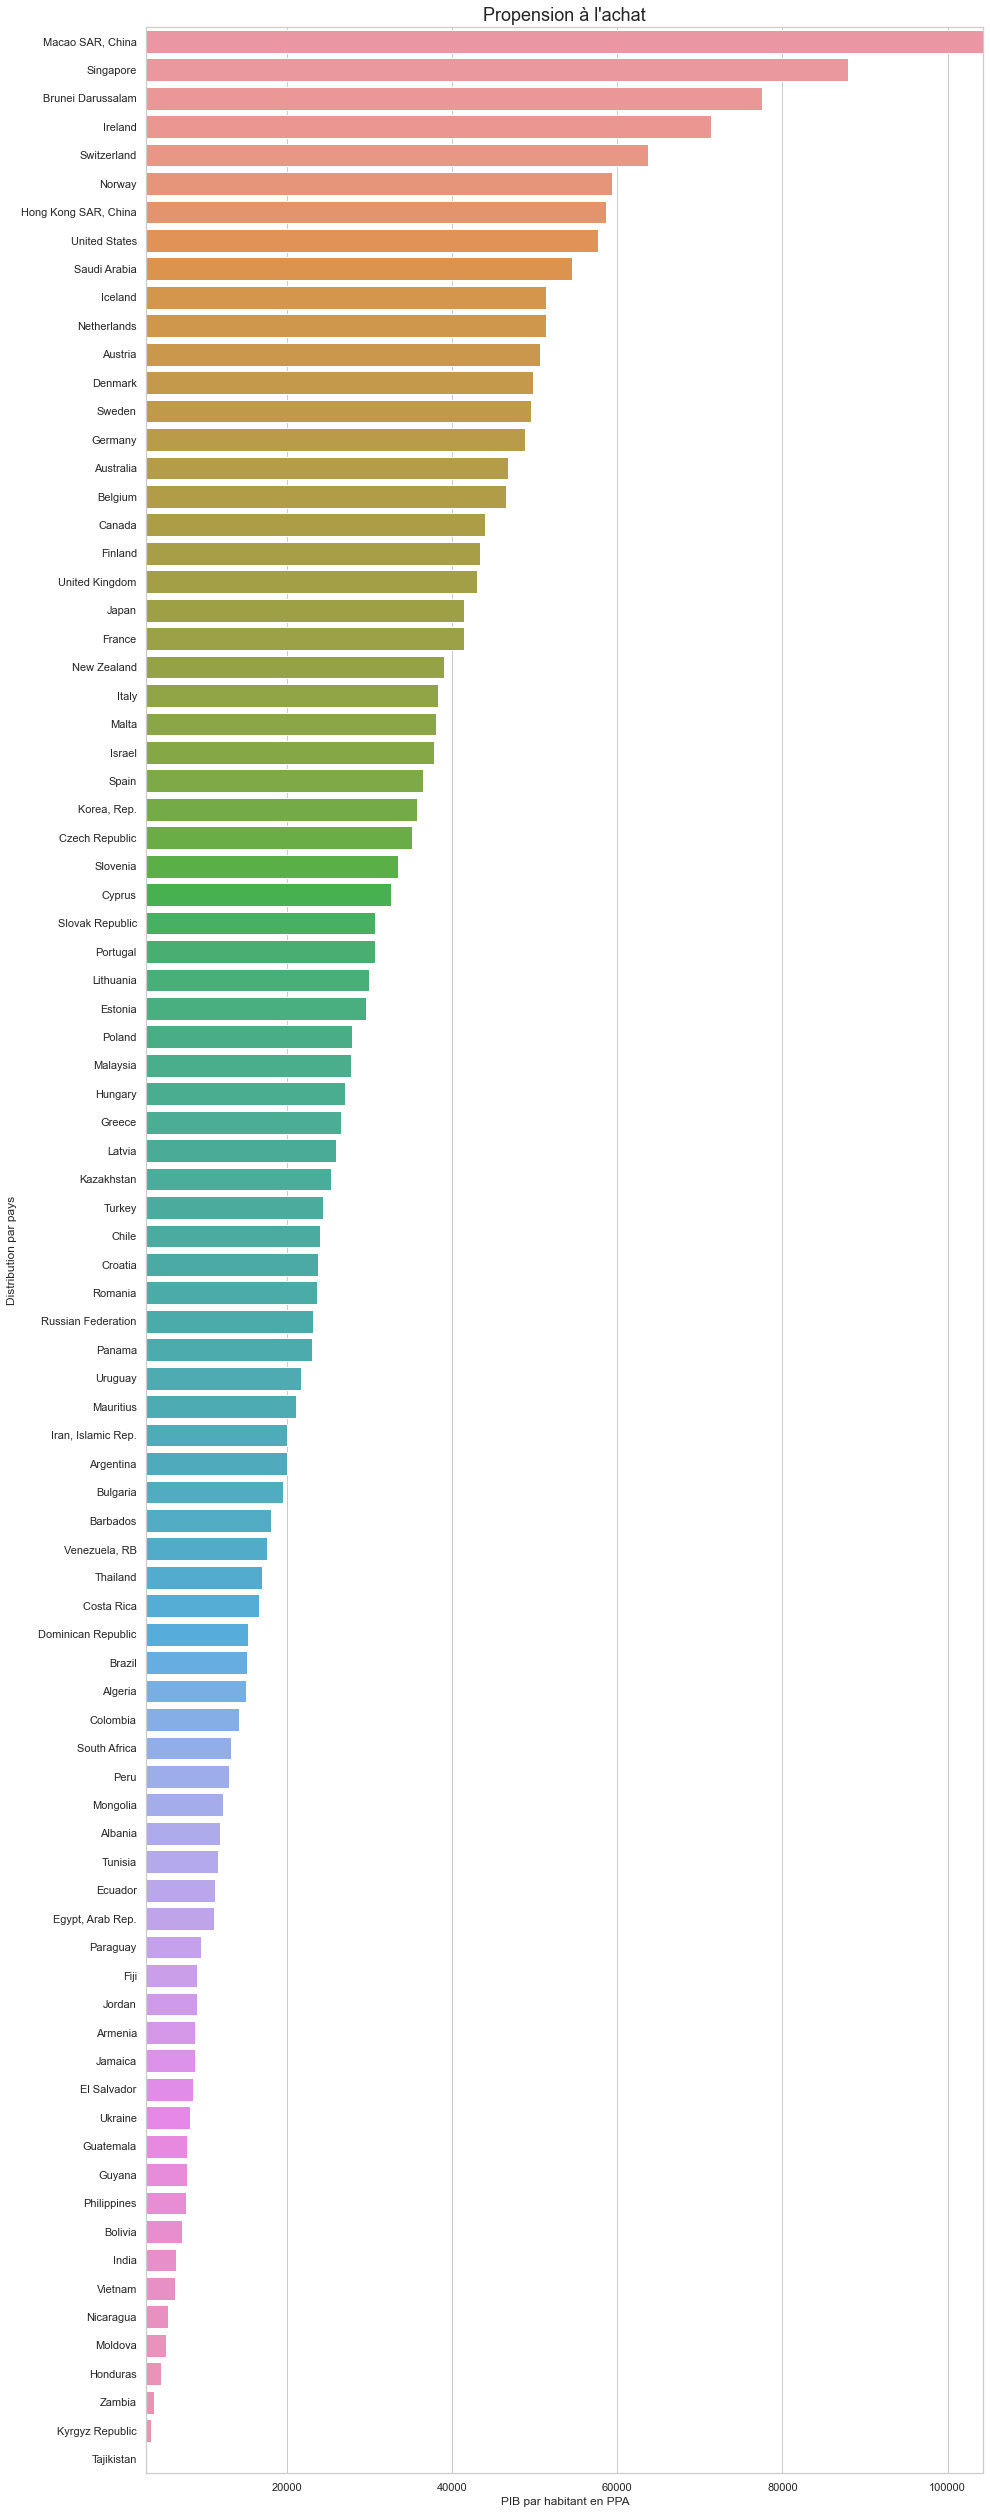

In [52]:
pouvoir_achat = df_final.reset_index().drop(columns=[
'Taux de remplacement des 15-24 ans',
'Scolarisation Moyenne en %',
'Étudiants Connectés en part',
"Investissement public dans l'éducation en % du PIB"
])
pouvoir_achat.set_axis(['Région','Distribution par pays','PIB par habitant en PPA'], axis=1, inplace=True)
pouvoir_achat_2 = pouvoir_achat.sort_values(['PIB par habitant en PPA'], ascending=False).reset_index(drop=True)
y= pouvoir_achat_2['Distribution par pays']
x= pouvoir_achat_2['PIB par habitant en PPA']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))
plt.xlim(pouvoir_achat[pouvoir_achat['Distribution par pays'] =='Tajikistan']['PIB par habitant en PPA'].item(),pouvoir_achat[pouvoir_achat['Distribution par pays'] =='Macao SAR, China']['PIB par habitant en PPA'].item())
plt.title("Propension à l'achat", size=18)
plot2 = sns.barplot(data=pouvoir_achat_2, x=x, y=y, orient='h')
plt.show()

### Par région

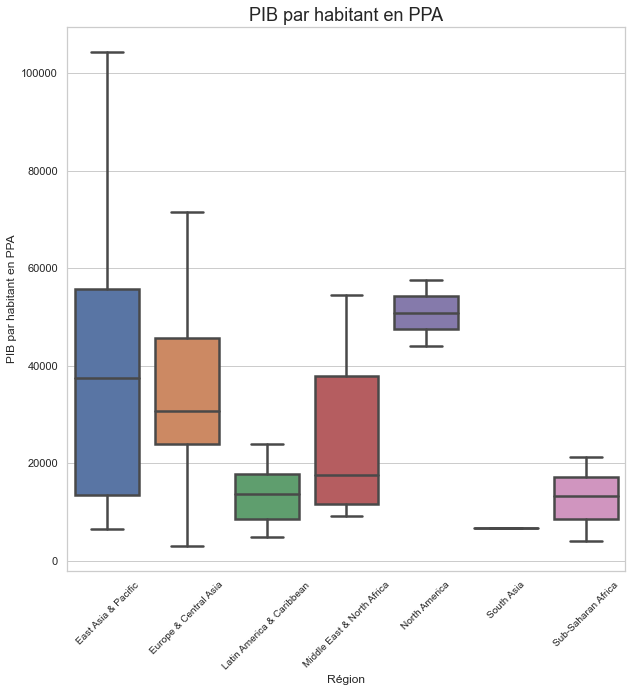

In [53]:
GraphBoxplot(pouvoir_achat, 'PIB par habitant en PPA','PIB par habitant en PPA','Région')

## 4.3 Scolarisation (scolarisation, population étudiante)

### Par pays

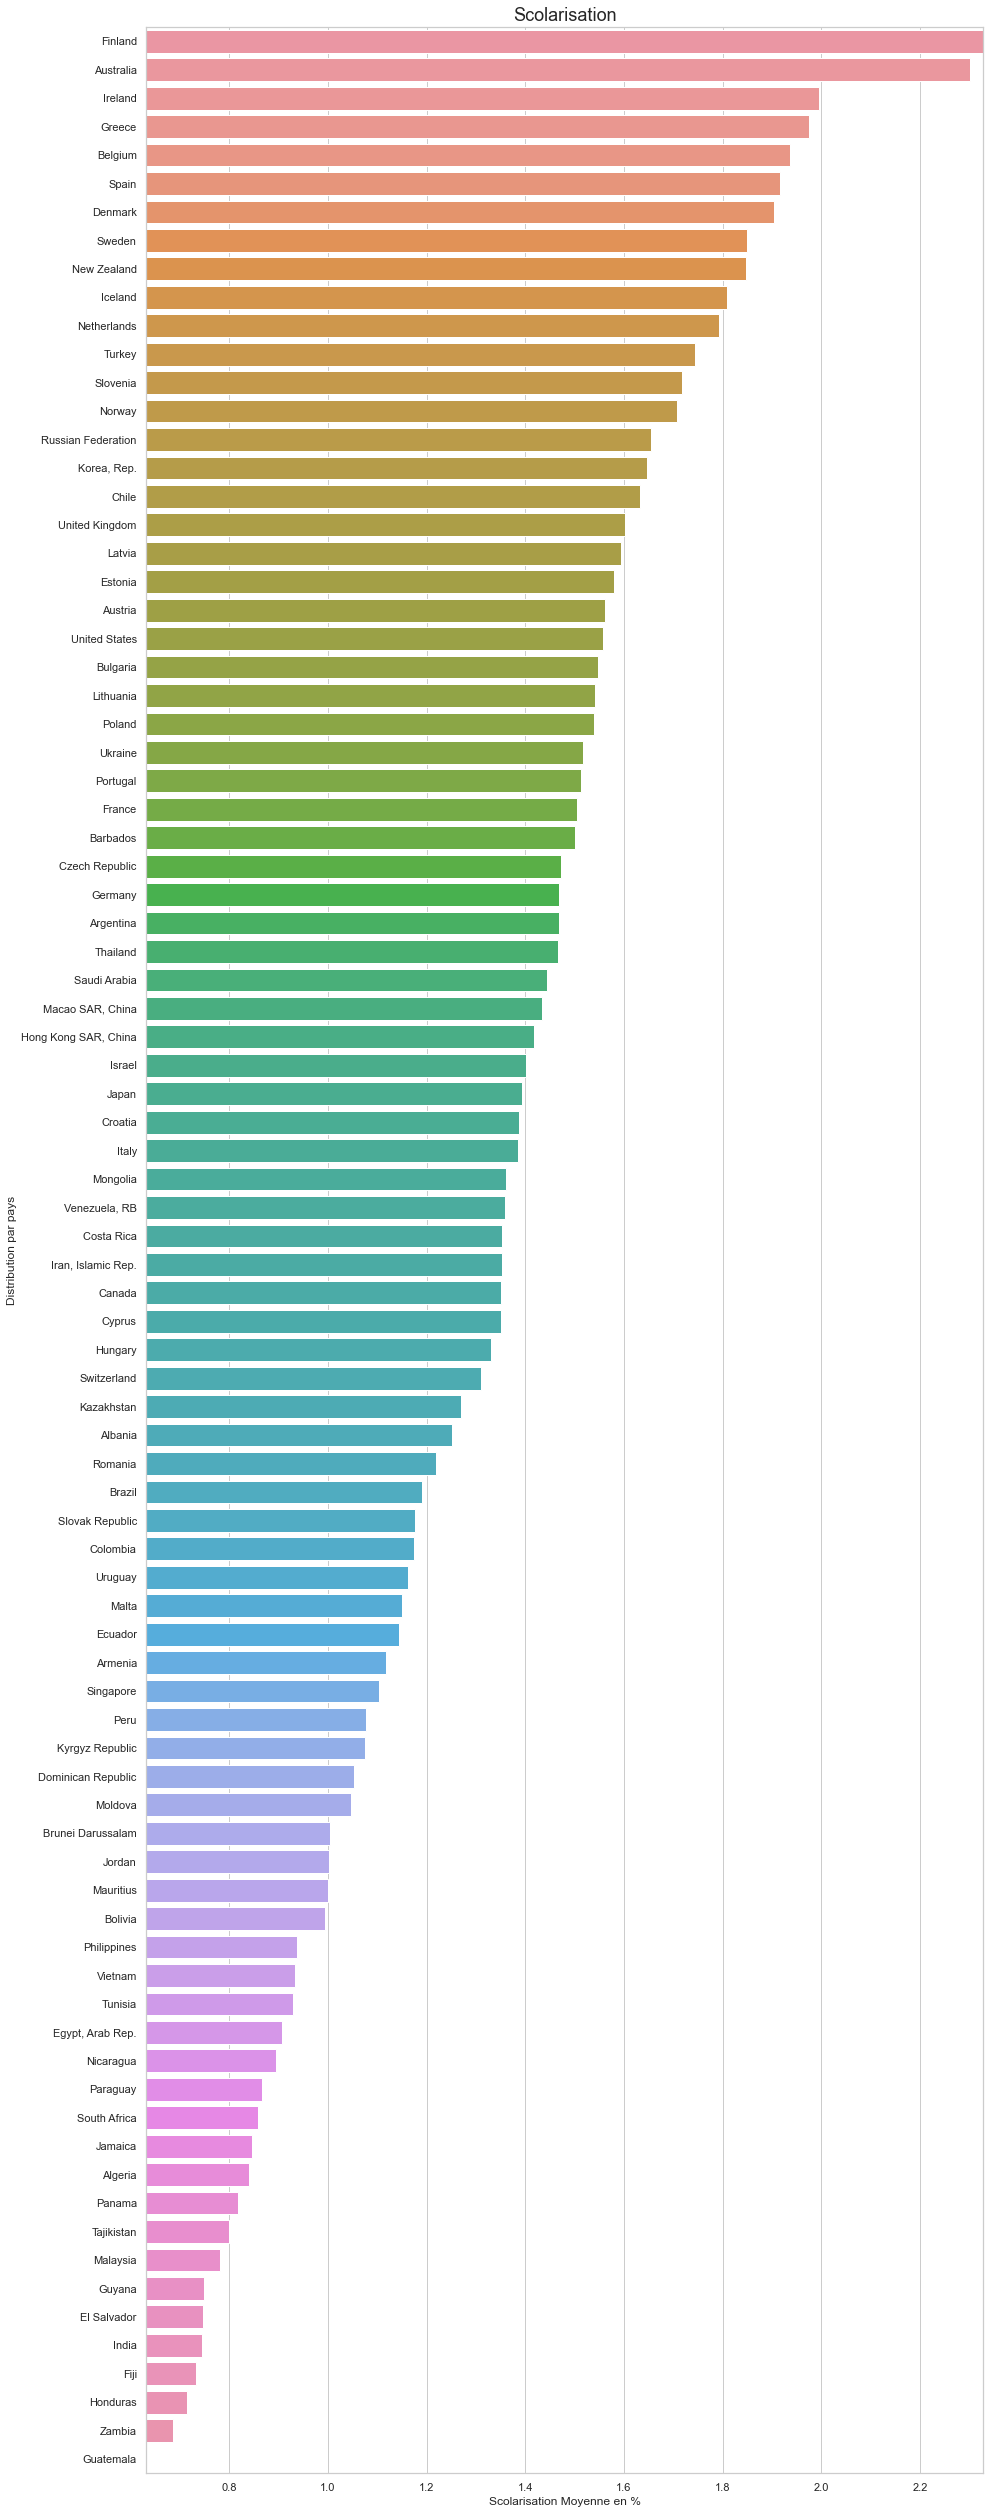

In [54]:
scolarisation = df_final.reset_index().drop(columns=[
'Taux de remplacement des 15-24 ans',
'PIB par habitant en PPA',
'Étudiants Connectés en part',
"Investissement public dans l'éducation en % du PIB"
])
scolarisation.set_axis(['Région','Distribution par pays','Scolarisation Moyenne en %'], axis=1, inplace=True)
scolarisation_2 = scolarisation.sort_values(['Scolarisation Moyenne en %'], ascending=False).reset_index(drop=True)
y= scolarisation_2['Distribution par pays']
x= scolarisation_2['Scolarisation Moyenne en %']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))
plt.xlim(scolarisation[scolarisation['Distribution par pays'] =='Guatemala']['Scolarisation Moyenne en %'].item(),scolarisation[scolarisation['Distribution par pays'] =='Finland']['Scolarisation Moyenne en %'].item())
plt.title('Scolarisation', size=18)
plot2 = sns.barplot(data=scolarisation_2, x=x, y=y, orient='h')
plt.show()

### Par région

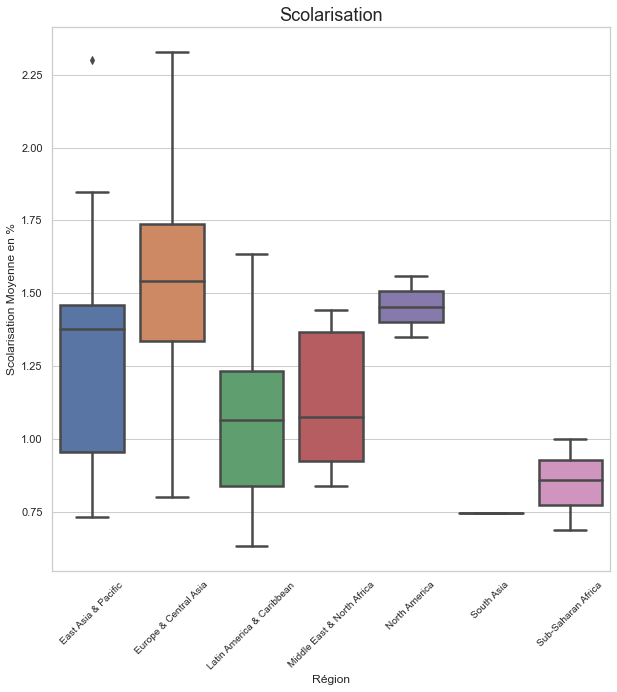

In [55]:
GraphBoxplot(scolarisation, 'Scolarisation','Scolarisation Moyenne en %','Région')

## 4.4 Prochaine génération étudiante (croissance de la population, taux de remplacement des 10-15 ans)

### Par pays

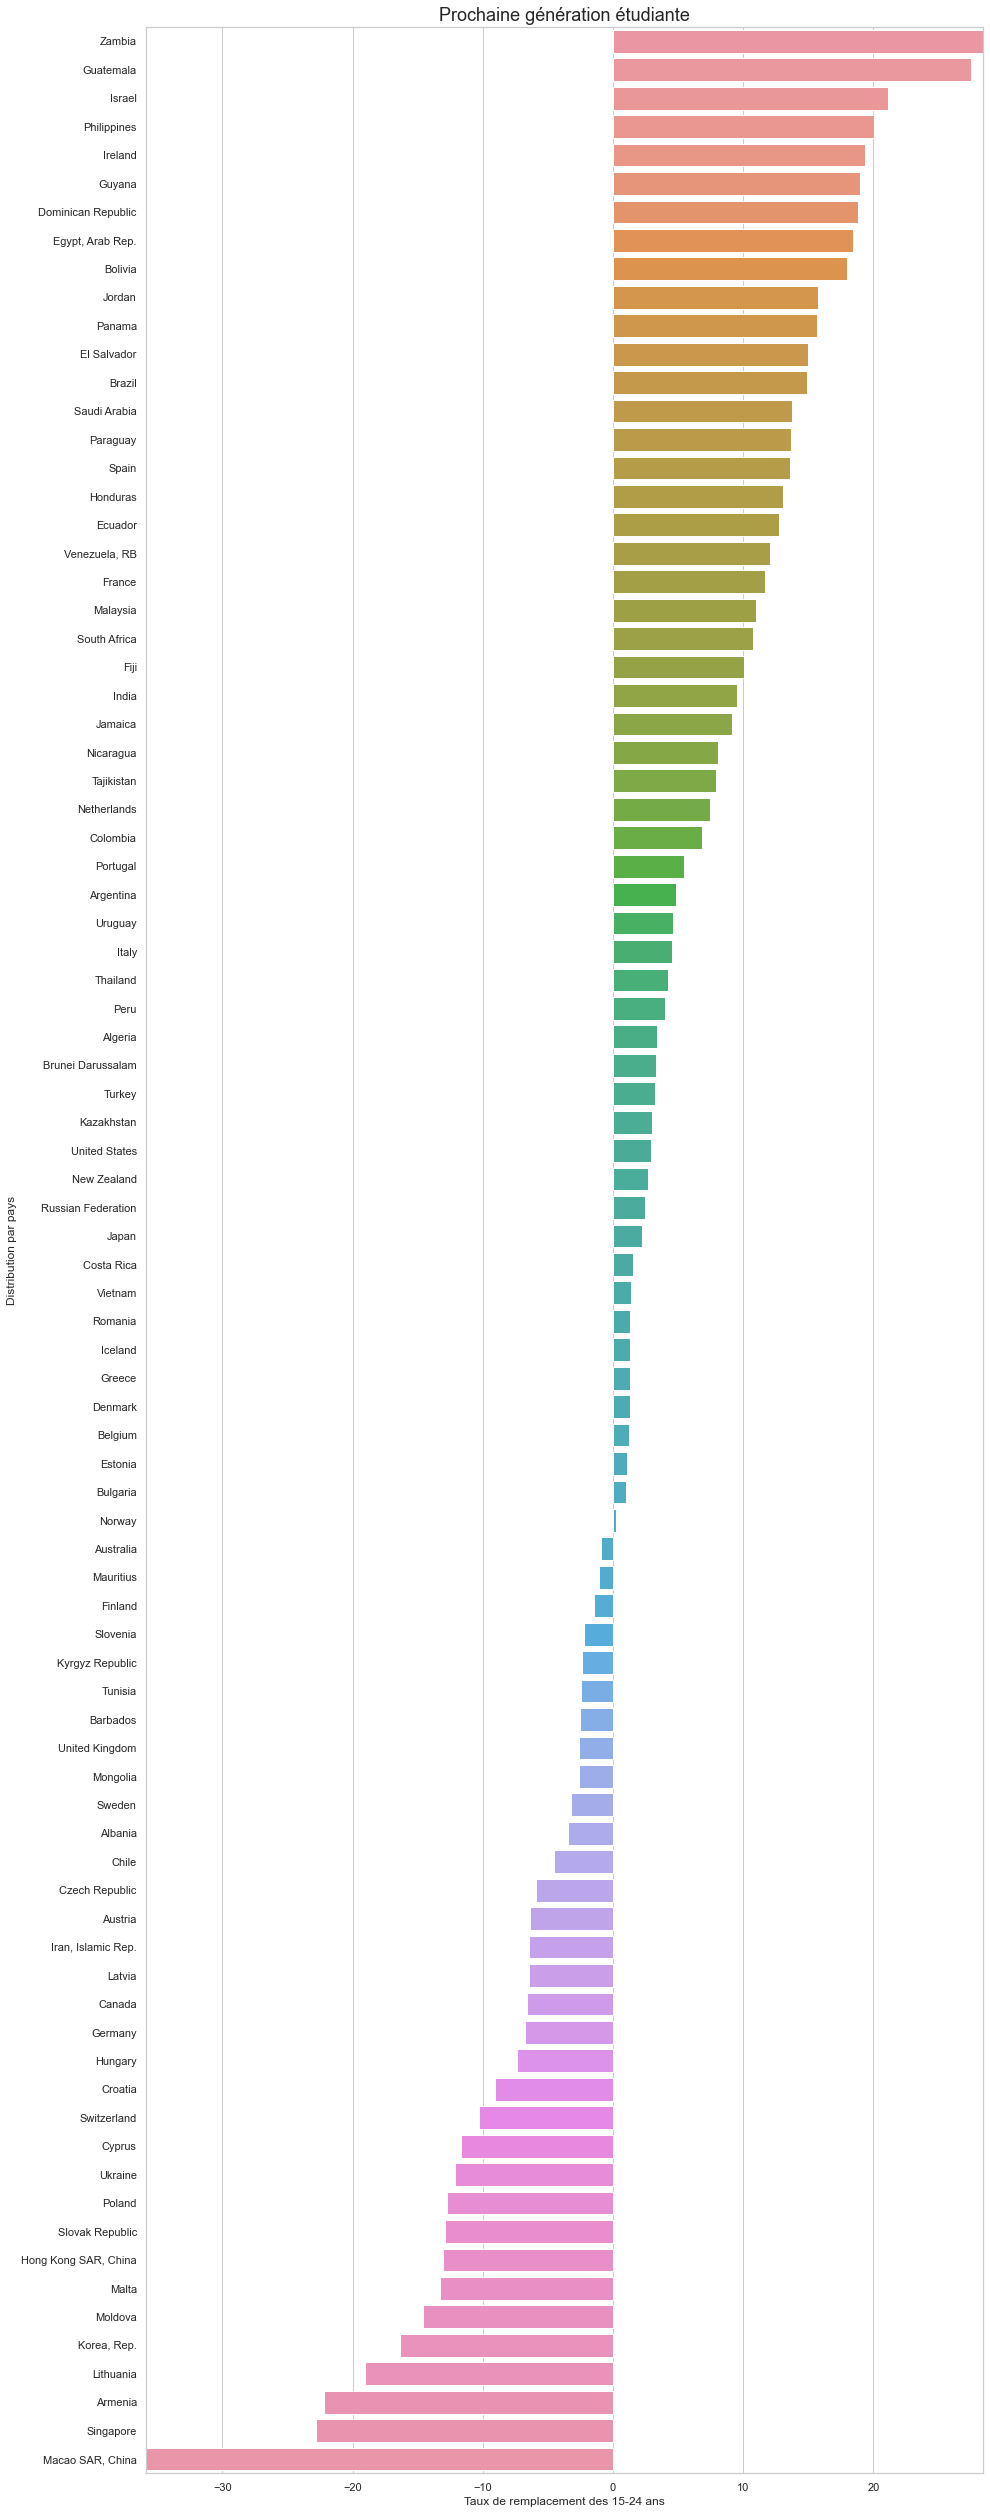

In [56]:
next_gen = df_final.reset_index().drop(columns=[
'Scolarisation Moyenne en %',
'PIB par habitant en PPA',
'Étudiants Connectés en part',
"Investissement public dans l'éducation en % du PIB"
])
next_gen.set_axis(['Région','Distribution par pays','Taux de remplacement des 15-24 ans'], axis=1, inplace=True)
next_gen_2 = next_gen.sort_values(['Taux de remplacement des 15-24 ans'], ascending=False).reset_index(drop=True)
y= next_gen_2['Distribution par pays']
x= next_gen_2['Taux de remplacement des 15-24 ans']
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))
plt.xlim(next_gen[next_gen['Distribution par pays'] =='Macao SAR, China']['Taux de remplacement des 15-24 ans'].item(),next_gen[next_gen['Distribution par pays'] =='Zambia']['Taux de remplacement des 15-24 ans'].item())
plt.title('Prochaine génération étudiante', size=18)
plot2 = sns.barplot(data=next_gen_2, x=x, y=y, orient='h')
plt.show()

### Par région

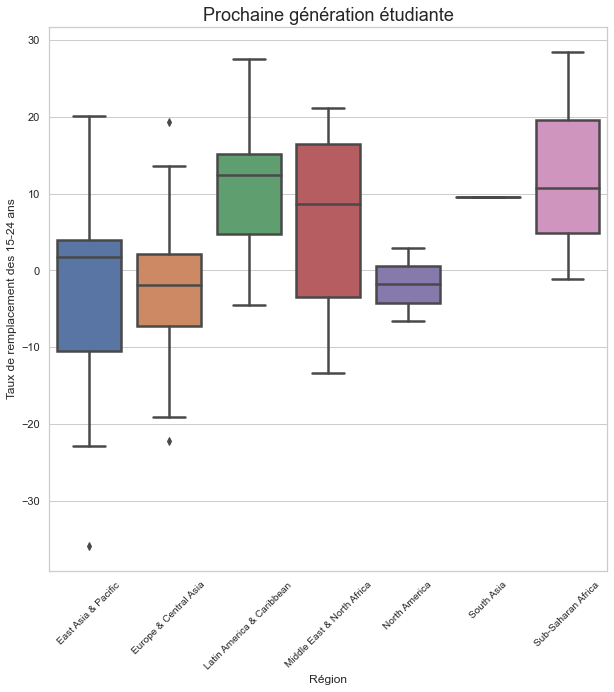

In [57]:
GraphBoxplot(next_gen, 'Prochaine génération étudiante','Taux de remplacement des 15-24 ans','Région')

## 4.5 Investissement public dans l'éducation

### Par pays

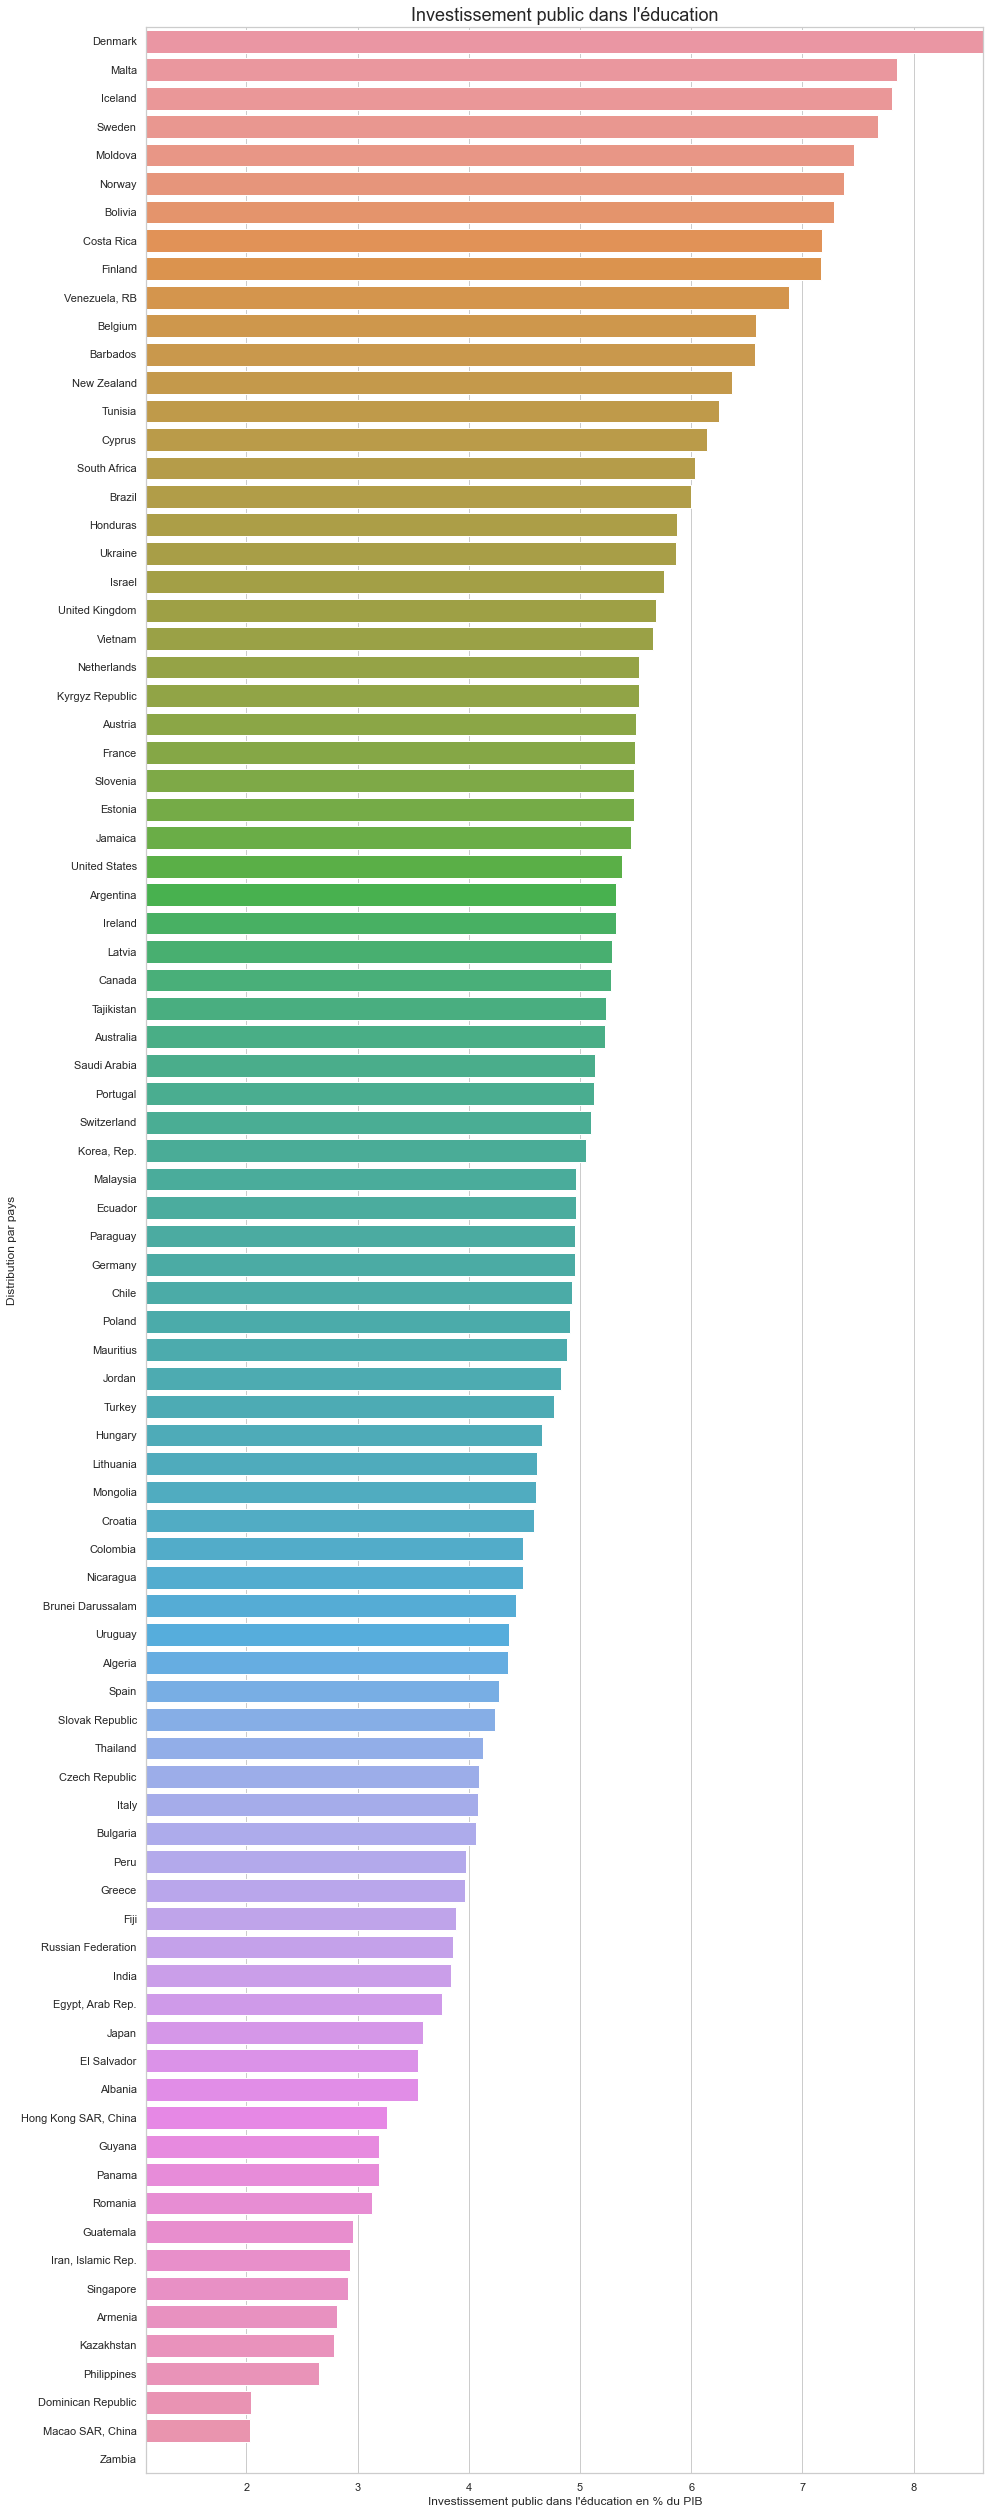

In [58]:
public_investment = df_final.reset_index().drop(columns=[
'Taux de remplacement des 15-24 ans',
'Scolarisation Moyenne en %',
'PIB par habitant en PPA',
'Étudiants Connectés en part',
])
public_investment.set_axis(['Région','Distribution par pays',"Investissement public dans l'éducation en % du PIB"], axis=1, inplace=True)
public_investment_2 = public_investment.sort_values(["Investissement public dans l'éducation en % du PIB"], ascending=False).reset_index(drop=True)
y= public_investment_2['Distribution par pays']
x= public_investment_2["Investissement public dans l'éducation en % du PIB"]
sns.set(style="whitegrid")
plt.figure(figsize=(15, 45))
plt.xlim(public_investment[public_investment['Distribution par pays'] =='Zambia']["Investissement public dans l'éducation en % du PIB"].item(),public_investment[public_investment['Distribution par pays'] =='Denmark']["Investissement public dans l'éducation en % du PIB"].item())
plt.title("Investissement public dans l'éducation", size=18)
plot2 = sns.barplot(data=public_investment_2, x=x, y=y, orient='h')
plt.show()

### Par région

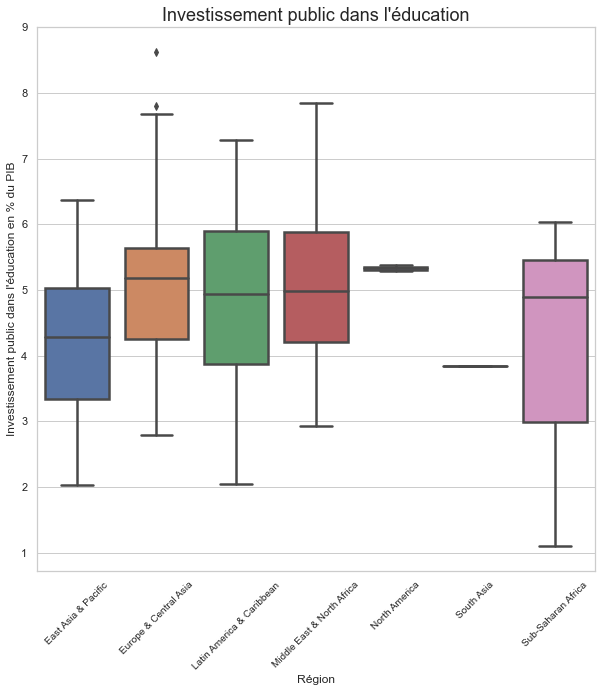

In [59]:
GraphBoxplot(public_investment, "Investissement public dans l'éducation","Investissement public dans l'éducation en % du PIB",'Région')

# 5. Le scoring

Le but est d'attribuer pour chaque valeur de chaque indicateur une note. On découpe alors entre la valeur minimale et la valeur maximale de chaque indicateur des percentiles. Toute valeur se trouvant forcément entre 2 percentiles, une boucle conditionnelle permettra d'appliquer une note à chaque valeur. Le tout sera retourné dans un DataFrame et nous pourrons exploiter ces résultats pour chaque pays comme pour chaque région.

## 5.1 Définition de classes 

Création de DataFrame découpant la différence entre la valeur minimale et maximale sous forme de percentile.

In [85]:
score_1 = jeunes_connectes.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
score_2 = pouvoir_achat.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
score_3 = scolarisation.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
score_4 = next_gen.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
score_5 = public_investment.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

## 5.2 Attribuer un nom

Pour chaque indicateur afin d'attribuer plus tard le nom de l'indicateur au résultat calculé.

In [61]:
jeunes_connectes.name = 'Jeunes connectés'
pouvoir_achat.name = "Pouvoir d'achat"
scolarisation.name = 'Scolarisation'
next_gen.name = 'Renouvellement étudiant'
public_investment.name = 'Public investment'

In [89]:
# Liste de tous les pays
list_pays = df_final.index.get_level_values(1).tolist()

# Liste de toutes les régions
list_region = df_final.index.get_level_values(0).tolist()

#Dictionnaire de tous les pays associés à leur région
dict_pays_region = dict(zip(list_pays, list_region))

# DataFrame à partir du dictionnaire
df_pays_region = pd.DataFrame(list(dict_pays_region.items()), columns=['Pays','Region'])

## 5.3 Fonction pour attribuer une note à chaque pays

Selon l'indicateur et le découpage par percentile associé, on créer un dataframe contenant le pays, l'indicateur et la note par association.

In [64]:
def ScoreMaker(indicateur,score):
    indicateur.index = indicateur['Distribution par pays']
    score_final = {}
    for pays in indicateur.index:
        if indicateur.loc[pays][2] > score.iloc[9][0]:
            score_final[pays] = 10
        elif indicateur.loc[pays][2] > score.iloc[8][0]:
            score_final[pays] = 9
        elif indicateur.loc[pays][2] > score.iloc[7][0]:
            score_final[pays] = 8
        elif indicateur.loc[pays][2] > score.iloc[6][0]:
            score_final[pays] = 7
        elif indicateur.loc[pays][2] > score.iloc[5][0]:
            score_final[pays] = 6
        elif indicateur.loc[pays][2] > score.iloc[4][0]:
            score_final[pays] = 5
        elif indicateur.loc[pays][2] > score.iloc[3][0]:
            score_final[pays] = 4
        elif indicateur.loc[pays][2] > score.iloc[2][0]:
            score_final[pays] = 3
        elif indicateur.loc[pays][2] > score.iloc[1][0]:
            score_final[pays] = 2
        elif indicateur.loc[pays][2] > score.iloc[0][0]:
            score_final[pays] = 1
        else: score_final[pays] = 0
        
    
    df_score = pd.DataFrame(list(score_final.items()), columns=['Pays','Score'])
    df_score['Indicateur'] = indicateur.name
    df_fin = df_pays_region.merge(df_score, on='Pays')
    return df_fin

## 5.4 Merge des 5 dataframe d'indicateurs

La fonction ScoreMaker crée un DataFrame avec 4 colonnes : Pays, Score, Indicateur, Région en fonction de 2 éléments : l'indicateur et le découpage par percentile. Une fois fait, il faut réunir les DataFrame des 5 indicateurs en 1 afin d'exploiter les données et les visualiser graphiquement.

In [115]:
final = ScoreMaker(jeunes_connectes,score_1).merge(ScoreMaker(pouvoir_achat,score_2),
                                           how='outer').merge(ScoreMaker(scolarisation,score_3),
                                                              how='outer').merge(ScoreMaker(next_gen,score_4),
                                                                                 how='outer').merge(ScoreMaker(public_investment,score_5),how='outer')

final.index = final['Pays']
#enlève la France du groupe de pays selectionné car nous y sommes déjà implanté
final=final.drop(['France']).reset_index(drop=True)
final.head(10)

,Pays,Region,Score,Indicateur
0,Australia,East Asia & Pacific,8,Jeunes connectés
1,Brunei Darussalam,East Asia & Pacific,1,Jeunes connectés
2,Fiji,East Asia & Pacific,1,Jeunes connectés
3,"Hong Kong SAR, China",East Asia & Pacific,5,Jeunes connectés
4,Japan,East Asia & Pacific,10,Jeunes connectés
5,"Korea, Rep.",East Asia & Pacific,9,Jeunes connectés
6,"Macao SAR, China",East Asia & Pacific,1,Jeunes connectés
7,Malaysia,East Asia & Pacific,7,Jeunes connectés
8,Mongolia,East Asia & Pacific,2,Jeunes connectés
9,New Zealand,East Asia & Pacific,5,Jeunes connectés


## 5.5 Résultat : Top 20 des pays où investir

Nous pouvons désormais afficher les 20 pays ayant eu le score le plus élevé en regroupant les données par pays et en classant de la meilleure à la pire note. À noter que les notes vont de 8 à 44 et resterons ainsi.

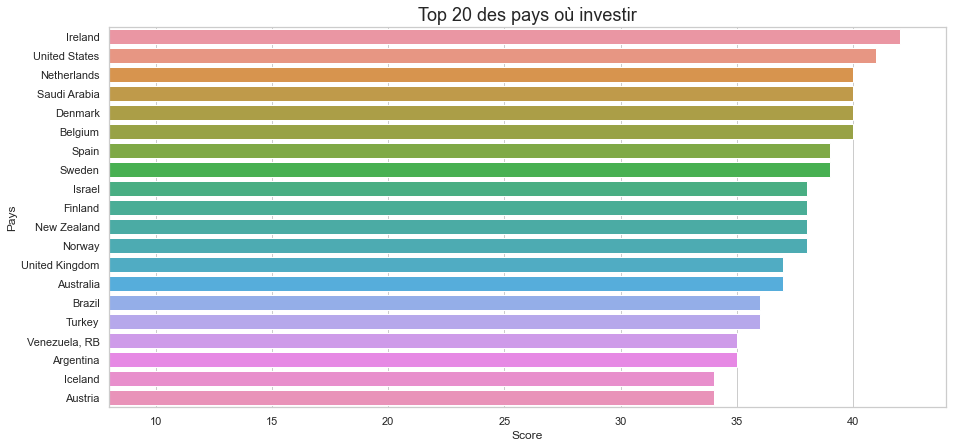

In [66]:
total_score = final.groupby(['Pays']).sum().sort_values(by='Score',ascending=False).reset_index()[0:20]

y= total_score['Pays']
x= total_score['Score']
sns.set(style="whitegrid")
plt.figure(figsize=(15,7))
plt.title('Top 20 des pays où investir', size=18)
plt.xlim(8,44)
plot3 = sns.barplot(data=total_score, x=x, y=y, orient='h')
plt.show()

## 5.6 Top 5 pays

Il faut maintenant créer un DataFrame pour chaque pays qui contienne ses notes pour tous les indicateurs. Une fois fait, nous pourrons les afficher en diagramme radar. Pour simplifier l'affichage, nous les regrouperons dans un seul DataFrame et appliquerons une boucle à la création du diagramme pour chaque pays.

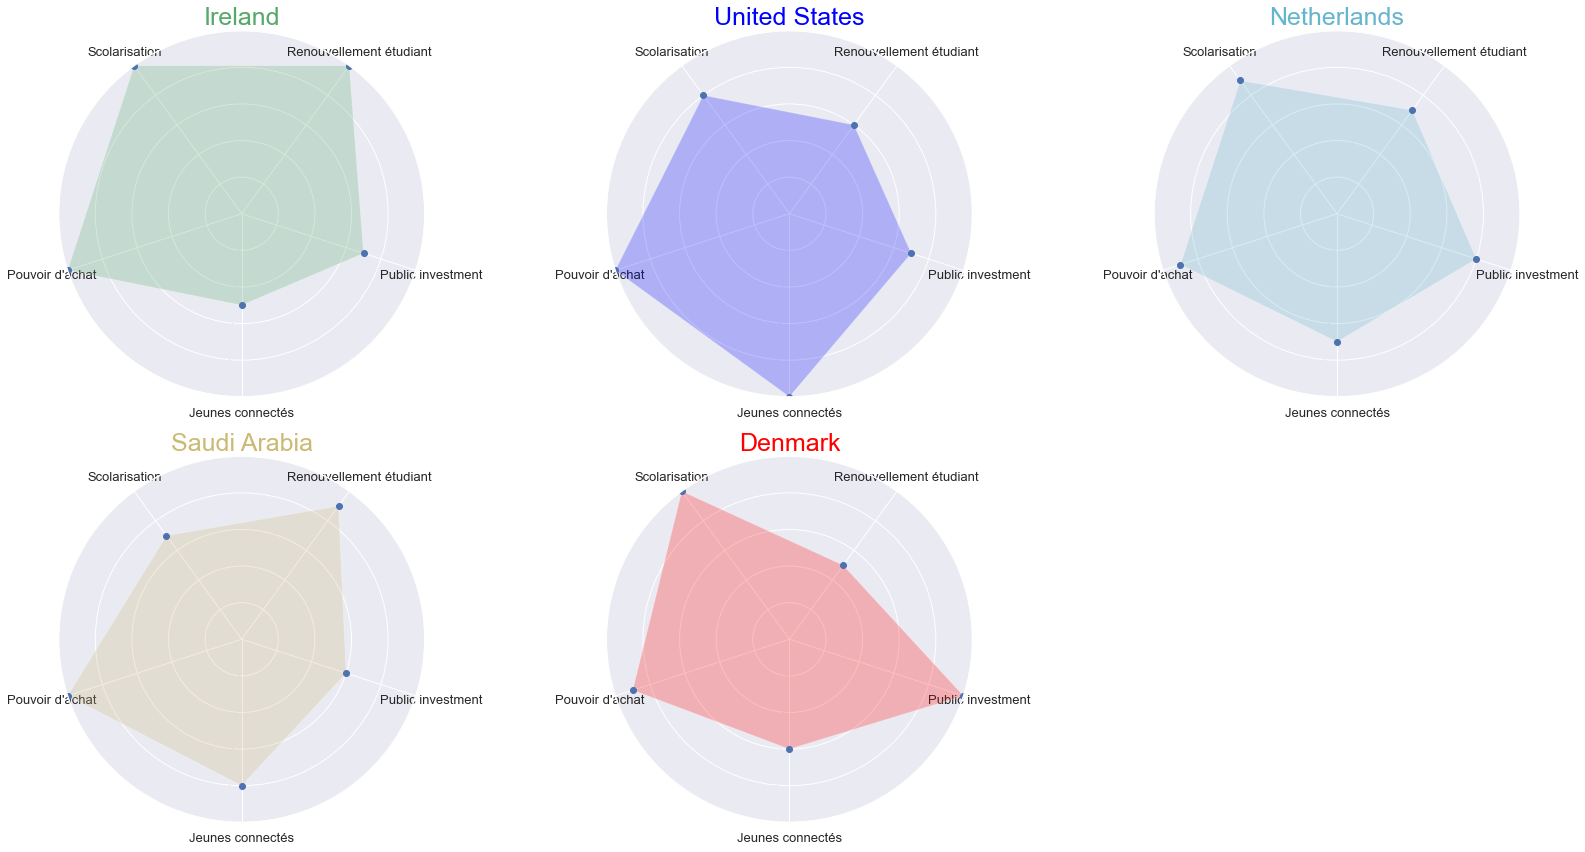

In [101]:
final.index = final['Pays']
country_scores = pd.DataFrame(columns=['Indicateur'])
for i in range(5):
    country_name = total_score['Pays'][i]
    country_data = final.loc[country_name].groupby(['Indicateur']).mean().reset_index().set_axis(['Indicateur',country_name], axis=1)
    country_scores = country_scores.merge(country_data, how='outer')
    
country_scores.index = country_scores['Indicateur']
country_scores = country_scores.drop(columns=['Indicateur']).T

GraphRadar(country_scores)

In [108]:
final.reset_index(drop=True)
total_score_region = final.groupby(['Region']).mean().sort_values(by='Score',ascending=False).reset_index()[0:5]

## 5.7 Top 5 région

Même opération que pour le top 5 des pays retenus.

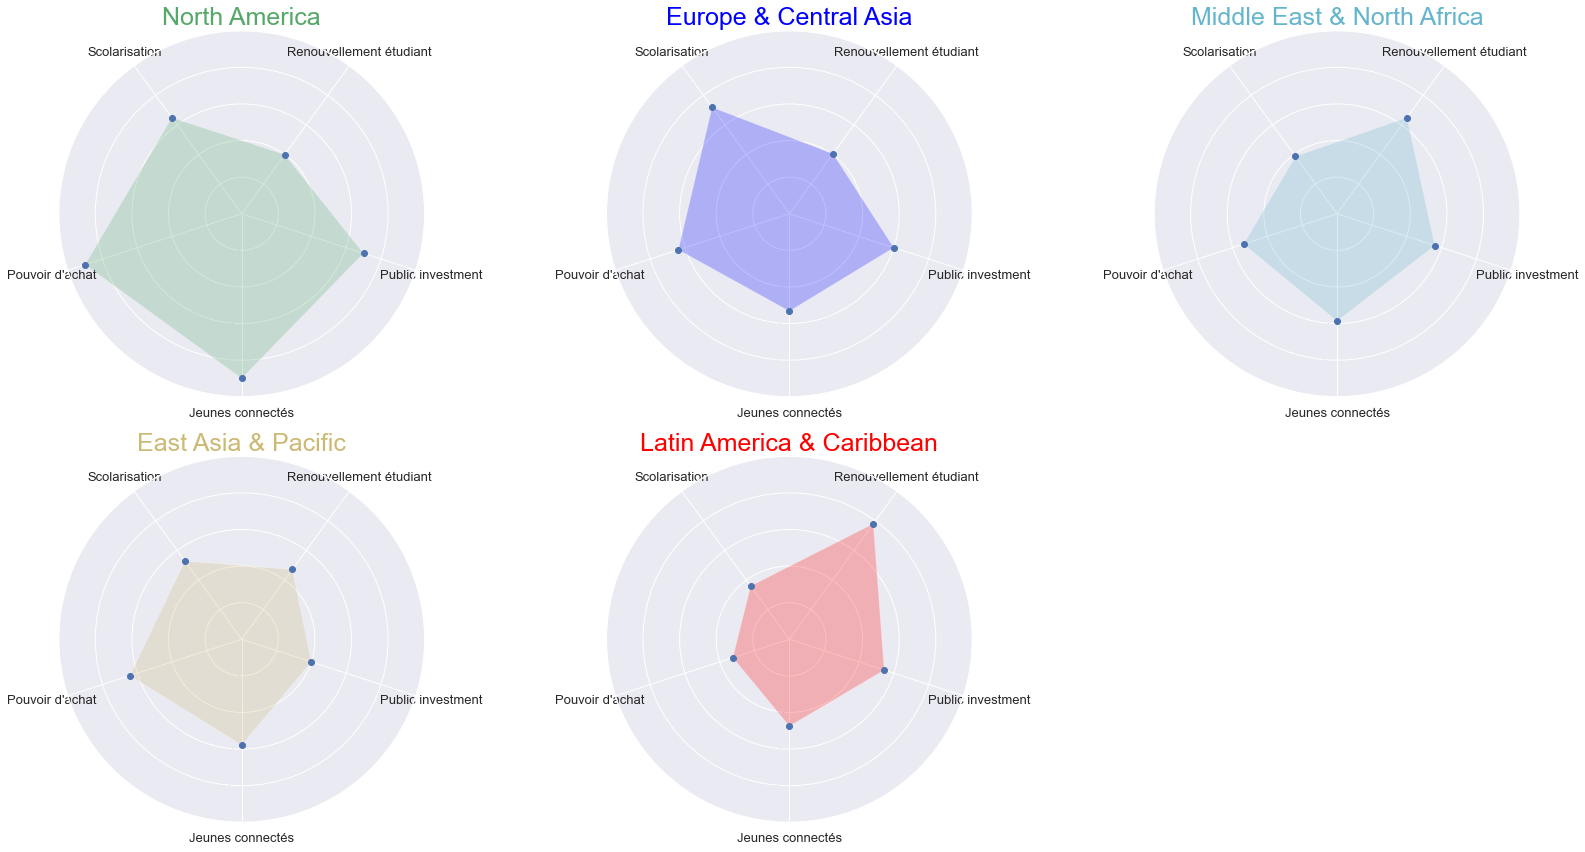

In [112]:
final.index = final['Region']
region_scores = pd.DataFrame(columns=['Indicateur'])
for i in range(5):
    region_name = total_score_region['Region'].unique()[i]
    region_data = final.loc[region_name].groupby(['Indicateur']).mean().reset_index().set_axis(['Indicateur',region_name], axis=1)
    region_scores = region_scores.merge(region_data, how='outer')

region_scores.index = region_scores['Indicateur']
region_scores = region_scores.drop(columns=['Indicateur']).T

GraphRadar(region_scores)

# 6. Projections

Afin de vérifier si le choix de ces 5 pays est porteur sur du long terme, nous allons sélectionner des indicateurs de la projection Wittgenstein et regarder leur évolution sur la période 2020-2100. Nous avons pu constater plus tôt qu'il y avait un groupe d'indicateurs remplis uniquement sur cette plage de date, appelés PRJ. J'utiliserais donc comme en première partie une fonction de recherche sémantique pour sélectionner les plus pertinents.

## 6.1 Recherche des indicateurs de projection pertinents

Je selectionne uniquement les indicateurs Wittgenstein en repartant du dernier DataFrame en date qui n'a pas fait de tri d'indicateurs, à savoir le df2.


In [69]:
# Garder uniquement les rows contenant le mot 'Wittgenstein'
projections = df2[df2['Indicator Name'].str.contains('Wittgenstein') == True]
projections.shape

(41272, 69)

In [70]:
indicators_in_subcategory =  projections['Indicator Name'].unique()
preselec = []

def SearchKeyword(s):
    for indicator in indicators_in_subcategory:
        if s in indicator:
            preselec.append(indicator)

SearchKeyword('Mean years of schooling.')
print(preselec)

['Wittgenstein Projection: Mean years of schooling. Age 0-19. Female', 'Wittgenstein Projection: Mean years of schooling. Age 0-19. Male', 'Wittgenstein Projection: Mean years of schooling. Age 0-19. Total', 'Wittgenstein Projection: Mean years of schooling. Age 15+. Female', 'Wittgenstein Projection: Mean years of schooling. Age 15+. Male', 'Wittgenstein Projection: Mean years of schooling. Age 15+. Total', 'Wittgenstein Projection: Mean years of schooling. Age 15-19. Female', 'Wittgenstein Projection: Mean years of schooling. Age 15-19. Male', 'Wittgenstein Projection: Mean years of schooling. Age 15-19. Total', 'Wittgenstein Projection: Mean years of schooling. Age 20-24. Female', 'Wittgenstein Projection: Mean years of schooling. Age 20-24. Male', 'Wittgenstein Projection: Mean years of schooling. Age 20-24. Total', 'Wittgenstein Projection: Mean years of schooling. Age 20-39. Female', 'Wittgenstein Projection: Mean years of schooling. Age 20-39. Male', 'Wittgenstein Projection: Me

In [71]:
# Comme plus haut, je stocke ici les indicateurs pertinents
projections_retenus = ['Wittgenstein Projection: Mean years of schooling. Age 25+. Total',
                       'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total',
                       'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total',
                      ]

## 6.2 Création d'un dataframe dédié à la projection

Je dois selectionner une plage d'année valide, garder uniquement les indicateurs qui m'intéressent et exclure les pays qui ne sont pas dans le top 20.

In [72]:
projections_2 = projections.groupby(['Country Name','Indicator Name']).sum()

list_year = projections_2.columns[48:]
# 41 272
projections_3 = projections_2.loc[:,projections_2.columns.isin(list_year)]
# 35 420

pays_top20 = total_score.drop(['Score'], axis=1)
pays_top20 = pays_top20['Pays'].values.tolist()

projections_4 = projections_3[projections_3.index.get_level_values(0).isin(pays_top20)]
# 15
projections_5 = projections_4[projections_4.index.get_level_values(1).isin(projections_retenus)]

In [73]:
#Vérifions s'il y a des données manquantes (réponse : non)
projections_5.groupby(level=projections_5.index.names).count().mean()

2020    1.0
2025    1.0
2030    1.0
2035    1.0
2040    1.0
2045    1.0
2050    1.0
2055    1.0
2060    1.0
2065    1.0
2070    1.0
2075    1.0
2080    1.0
2085    1.0
2090    1.0
2095    1.0
2100    1.0
dtype: float64

## 6.3 Pourcentage d'évolution de l'ensemble des indicateurs

Afin d'attribuer à chaque pays du top 20 un potentiel d'évolution, j'ai décidé de construire un pourcentage d'évolution sur 3 critères : Le nombre d'années d'études moyen, le pourcentage de la population ayant terminé ses études au lycée et en études supérieures. Pour cela je décide de m'orienter vers un data-frame 'Long-Form' afin de faciliter plus tard la manipulation du graphique. Pour simplifier la lecture, il faudra que tous les indicateurs soient regroupés en 1, on le verra plus bas. Enfin il est important d'avoir la liste des pays dans l'ordre du scoring défini précédemment. J'attribuerais donc le nombre de 0 à 19 aux pays du top 20.

Je devrais donc avoir comme colonne :
- Rang
- Année
- Pays
- Indicateur

In [74]:
# Je pars d'un DataFrame groupé en index par Pays et indicateurs
projections_6 = projections_5.T

# J'inverse index et colonnes
projections_7 = projections_6.stack([0])

# Je remplace les valeurs des indicateurs existants par des taux d'accroissement de ces mêmes indicateurs selon la moyenne
projections_7['Mean years of schooling evolution'] = projections_7['Wittgenstein Projection: Mean years of schooling. Age 25+. Total']/projections_7['Wittgenstein Projection: Mean years of schooling. Age 25+. Total'].mean()*100
projections_7['Post Secondary'] = projections_7['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total']/projections_7['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'].mean()*100
projections_7['Upper Secondary'] = projections_7['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total']/projections_7['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total'].mean()*100

# Je supprime les anciens indicateurs
projections_8 = projections_7.drop(['Wittgenstein Projection: Mean years of schooling. Age 25+. Total','Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total','Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total'], axis=1)

# Je fais la moyenne des taux d'accroissement des 3 indicateurs
projections_9 = (projections_8['Mean years of schooling evolution']+projections_8['Post Secondary']+projections_8['Upper Secondary'])/3

# Je renomme les colonnes
projections_9 = projections_9.reset_index().set_axis(['Year','Pays','Value'], axis=1)

In [75]:
# Je crée un DataFrame du Top 20 pays incluant les pays dans l'ordre décroissant et leur rangs associés
top_20 = total_score.drop(['Score'], axis=1).reset_index().set_axis(['Rang','Pays'], axis=1)

In [116]:
# Il s'agit du DataFrame final permettant de projetter un graphique d'évolution des pays du top 20.
evolution_top_20 = top_20.merge(projections_9,on='Pays')
evolution_top_20.head(10)

,Rang,Pays,Year,Value
0,0,Ireland,2020,85.336899
1,0,Ireland,2025,90.065402
2,0,Ireland,2030,93.716285
3,0,Ireland,2035,97.367168
4,0,Ireland,2040,101.018051
5,0,Ireland,2045,102.457342
6,0,Ireland,2050,105.859256
7,0,Ireland,2055,108.127198
8,0,Ireland,2060,109.566489
9,0,Ireland,2065,111.834432


## 6.4 Graphique d'évolution pour le top 20 pays

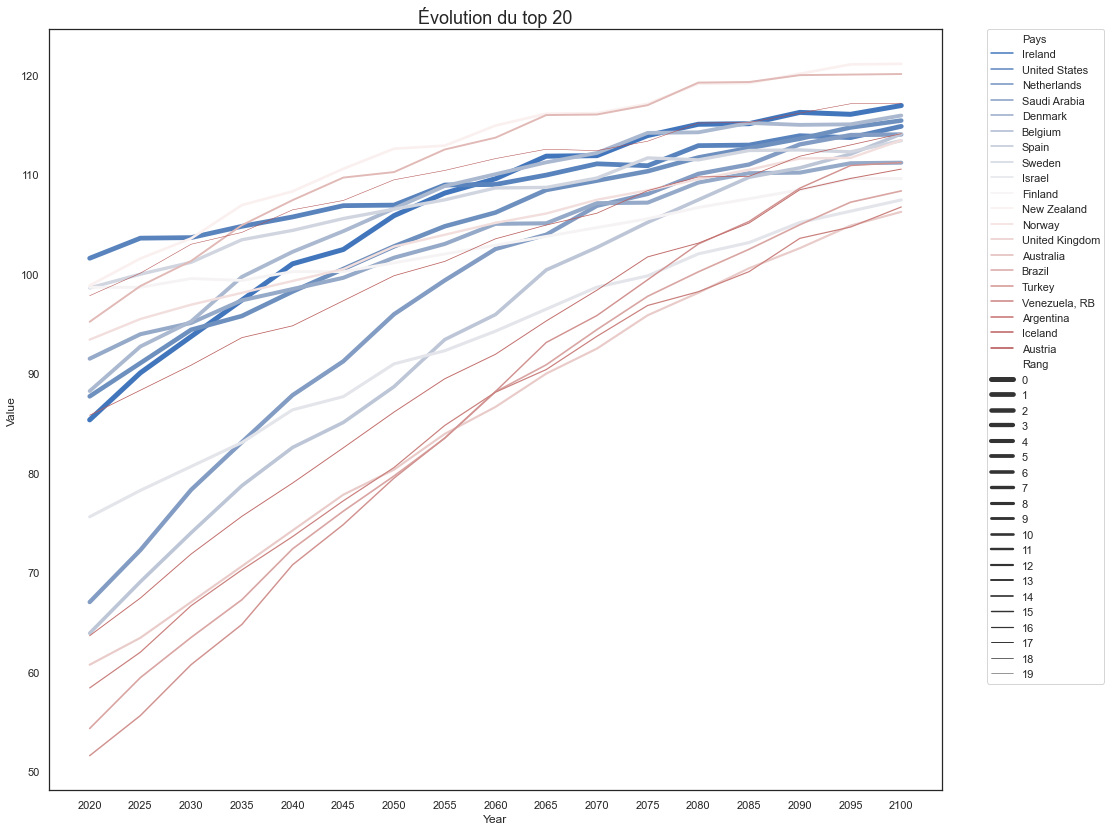

In [77]:
sns.set(style="white")
plt.figure(figsize=(16,14))
plt.title('Évolution du top 20', size=18)
plot = sns.lineplot(data=evolution_top_20, x='Year', y='Value', hue='Pays',size='Rang',sizes=(5,.5),palette="vlag",legend="full")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()